# Analysis of Reader Behaviour using New York Times Comments

## Introduction
Hello! This is Caren, Ruchi and Aishwarya's CIS545 Project.

We use a dataset containing articles and comments obtained from the well known newspaper 'The New York Times' to extract patterns in reader behaviour and NYT article trends across multiple domains and subsequently determine public opinion and impact from the analysis of their behaviour and reception of various articles.

This notebook will walk you through the entire process by downloading and acquiring datasets, conducting an exploratory data analysis, data wrangling, feature engineering and modelling. 

These are the concepts we have attempted to capture through the project :



*   Data Cleaning
*   Data Visualization
*   Feature Engineering
*   Word Clouds
*   Label Encoders 
*   Correlation Matrix
*   Sentiment Analysis using TF- IDF
*   Modelling - Linear and Logistic Regression, Random Forest Classifiers, K Nearest Neighbours, Naive Bayes etc
*   Resampling of data
*   Spark SQL
*   Clustering







Let's begin!

## Importing Modules

We use the following modules to perform the analysis. 

In [1]:
import os
import pandas as pd
import numpy as np
import math
import re
import copy
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import (roc_auc_score, classification_report, log_loss, make_scorer, 
                             recall_score, precision_recall_curve, roc_curve)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion

#Sentiment Analysis
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Loading & Preprocessing
We initially mount the drive and load the New York Times dataset (https://www.
kaggle.com/aashita/nyt-comments)

Run the following load drive file. But before, add the shared dataset drive folder as a shortcut to My Drive

Steps:
1. Go to drive folder which contains the dataset. (Link: https://drive.google.com/drive/folders/1bCan5PrpBklX1X8EGyFYM036ngrmRNFO?usp=sharing)

2. From the drop down menu for the folder, Select Add shhortcut to Drive -> Add Shortcut

3. Load the next part to mount the drive for the folder. You can change the path incase it was saved to another section


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/CIS545_NYT_Comments"
os.chdir(path)

### Loading and Combining the CSVs

The dataset consists of New York Times' articles and comments collected across a period of 5 months in 2017 and 2018. We initially use pandas to load these csv files and then concatenate them into two separate dataframes - one for the comments and the other for the articles, across the different months.

The articles and comments for each month are read into separate dataframes, named according the months. 

In [4]:
articles_april17_df = pd.read_csv("ArticlesApril2017.csv")
articles_april18_df = pd.read_csv("ArticlesApril2018.csv")
articles_feb17_df = pd.read_csv("ArticlesFeb2017.csv")
articles_feb18_df = pd.read_csv("ArticlesFeb2018.csv")
articles_jan17_df = pd.read_csv("ArticlesJan2017.csv")
articles_jan18_df = pd.read_csv("ArticlesJan2018.csv")
articles_march17_df = pd.read_csv("ArticlesMarch2017.csv")
articles_march18_df = pd.read_csv("ArticlesMarch2018.csv")
articles_may17_df = pd.read_csv("ArticlesMay2017.csv")
comments_april17_df = pd.read_csv("CommentsApril2017.csv")
comments_april18_df = pd.read_csv("CommentsApril2018.csv")
comments_feb17_df = pd.read_csv("CommentsFeb2017.csv")
comments_feb18_df = pd.read_csv("CommentsFeb2018.csv")
comments_jan17_df = pd.read_csv("CommentsJan2017.csv")
comments_jan18_df = pd.read_csv("CommentsJan2018.csv")
comments_march17_df = pd.read_csv("CommentsMarch2017.csv")
comments_march18_df = pd.read_csv("CommentsMarch2018.csv")
comments_may17_df = pd.read_csv("CommentsMay2017.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/li

The comments and articles are combined into two separate dataframes using the .concat() function from the pandas library.

In [5]:
comments_df = pd.concat([comments_jan17_df, comments_jan18_df, 
                         comments_feb17_df, comments_feb18_df, 
                         comments_march17_df, comments_march18_df, 
                         comments_april17_df, comments_april18_df, 
                         comments_may17_df],  ignore_index=True)
comments_df

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455908,N. Smith,64679318.0,New York City,NaN,NaN,News
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN,News
2,1483455655,58691a5795d0e039260788b9,1324.0,Democrats are comprised of malcontents who gen...,20969855.0,20969855.0,<br/>,comment,1.483431e+09,1.0,0,0.0,National,0.0,NaN,20969855,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455655,Frank Fryer,76788711.0,Florida,NaN,NaN,News
3,1483455653,58691a5795d0e039260788b9,1324.0,The picture in this article is the face of con...,20969407.0,20969407.0,<br/>,comment,1.483419e+09,1.0,0,0.0,National,0.0,NaN,20969407,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455653,James Young,72718862.0,Seattle,NaN,NaN,News
4,1483455216,58691a5795d0e039260788b9,1324.0,Elections have consequences.,20969274.0,20969274.0,NaN,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969274,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455216,M.,7529267.0,Seattle,NaN,NaN,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176359,1496428934,5930ae877c459f24986e2f33,1176.0,C'mon Connecticut...let's add ourselves to the...,22713248.0,22713248.0,<br/>,userReply,1.496427e+09,2.0,0,22711384.0,Foreign,22711384.0,Katy,22711384:22713248,http://graphics8.nytimes.com/images/apps/times...,12.0,2.0,NaN,0.0,NaN,Unknown,1,approved,1.0,0.0,1496428934,pmulberry,3771862.0,"Cornwall, CT",NaN,NaN,News
2176360,1496439983,5930ae877c459f24986e2f33,1176.0,Write or call Hickenlooper's office! It was on...,22715167.0,22715167.0,<br/>,userReply,1.496439e+09,2.0,0,22711384.0,Foreign,22711384.0,Katy,22711384:22715167,http://graphics8.nytimes.com/images/apps/times...,12.0,2.0,NaN,0.0,NaN,Unknown,0,approved,1.0,0.0,1496439983,geez,63494752.0,Boulder,NaN,NaN,News
2176361,1496452744,5930ae877c459f24986e2f33,1176.0,"C'mon North Carolina! -- oh, who am I kidding.",22716312.0,22716312.0,<br/>,userReply,1.496453e+09,2.0,0,22711384.0,Foreign,22711384.0,Katy,22711384:22716312,http://graphics8.nytimes.com/images/apps/times...,12.0,2.0,NaN,0.0,NaN,Unknown,0,approved,1.0,1.0,1496452744,Liz,28028109.0,Raleigh,NaN,NaN,News
2176362,1496451596,5930ae877c459f24986e2f33,1176.0,"California is the federal government's #1 ""don...",22716238.0,22716238.0,<br/>,userReply,1.496452e+09,2.0,0,22711373.0,Foreign,22711373.0,Jane,22711373:22716238,https://s3.amazonaws.com/pimage.timespeople.ny...,12.0,3.0,NaN,0.0,NaN,Unknown,0,approved,1.0,0.0,1496451596,CarissaV,72050670.0,<br/>,NaN,NaN,News


In [6]:
articles_df = pd.concat([articles_jan17_df, articles_jan18_df, 
                         articles_feb17_df, articles_feb18_df, 
                         articles_march17_df, articles_march18_df, 
                         articles_april17_df, articles_april18_df, 
                         articles_may17_df],  ignore_index=True)
articles_df

,articleID,abstract,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount
0,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...,1324
1,586967bf95d0e03926078915,NaN,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...,2836
2,58698a1095d0e0392607894a,NaN,By CAITLIN LOVINGER,article,Little Troublemakers,"['Crossword Puzzles', 'Boxing Day', 'Holidays ...",1,Games,0,2017-01-01 23:00:24,Unknown,Chuck Deodene puts us in a bubbly mood.,The New York Times,News,https://www.nytimes.com/2017/01/01/crosswords/...,445
3,5869911a95d0e0392607894e,NaN,By JOCHEN BITTNER,article,"Angela Merkel, Russia’s Next Target","['Cyberwarfare and Defense', 'Presidential Ele...",1,OpEd,15,2017-01-01 23:30:27,Unknown,"With a friend entering the White House, Vladim...",The New York Times,Op-Ed,https://www.nytimes.com/2017/01/01/opinion/ang...,864
4,5869a61795d0e03926078962,NaN,By JIAYIN SHEN,article,Boots for a Stranger on a Bus,"['Shoes and Boots', 'Buses', 'New York City']",0,Metro,12,2017-01-02 01:00:02,Unknown,Witnessing an act of generosity on a rainy day.,The New York Times,Brief,https://www.nytimes.com/2017/01/01/nyregion/me...,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9330,593087d17c459f24986e2ed8,NaN,By DEB AMLEN,article,"Yes, You Can Write More Than One Letter in a S...",['Crossword Puzzles'],65,Games,0,2017-06-01 21:31:55,Unknown,Rebuses are crossword elements where solvers a...,The New York Times,News,https://www.nytimes.com/2017/06/01/crosswords/...,609
9331,59308fdc7c459f24986e2ef2,NaN,By PAUL KRUGMAN,article,Trump’s Act Of Gratuitous Destruction,"['United States Economy', 'United Nations Fram...",3,OpEd,25,2017-06-01 22:06:15,Unknown,"To the president and the right, it’s all about...",The New York Times,Op-Ed,https://www.nytimes.com/2017/06/01/opinion/tru...,797
9332,5930a48f7c459f24986e2f24,NaN,By GINIA BELLAFANTE,article,"Petty Crime, Daunting Bail","['Bail', 'Robberies and Thefts', 'Poverty', 'L...",3,Metropolitan,1,2017-06-01 23:34:14,Unknown,Using conflict resolution and social services ...,The New York Times,News,https://www.nytimes.com/2017/06/01/nyregion/ge...,945
9333,5930aa877c459f24986e2f2a,NaN,By BARBARA BOLTON,article,Unknown,"['Bay Ridge (Brooklyn, NY)']",0,Metro,22,2017-06-02 00:00:04,Unknown,A bus rider wants a tale to conclude before he...,The New York Times,News,https://www.nytimes.com/2017/06/01/nyregion/me...,141


Now that we have finished loading the dataset, lets work towards cleaning and analysing to understand what the data is telling us. Our main structure for the notebook is to introduce a general topic we will be exploring, then we will first clean the dataset for the goal and then move to the analysis.  We will be cleaning data for the topics as we go along. 

## Exploratory Data Analysis and Wrangling



### Exploring the dataframes
Let us first take a look at the two dataframes to observe the features and the data available for analysis.

In [ ]:
articles_df.dtypes

articleID           object
abstract            object
byline              object
documentType        object
headline            object
keywords            object
multimedia           int64
newDesk             object
printPage            int64
pubDate             object
sectionName         object
snippet             object
source              object
typeOfMaterial      object
webURL              object
articleWordCount     int64
dtype: object

In [ ]:
comments_df.dtypes

approveDate                int64
articleID                 object
articleWordCount         float64
commentBody               object
commentID                float64
commentSequence          float64
commentTitle              object
commentType               object
createDate               float64
depth                    float64
editorsSelection           int64
inReplyTo                float64
newDesk                   object
parentID                 float64
parentUserDisplayName     object
permID                    object
picURL                    object
printPage                float64
recommendations          float64
recommendedFlag          float64
replyCount               float64
reportAbuseFlag          float64
sectionName               object
sharing                    int64
status                    object
timespeople              float64
trusted                  float64
updateDate                 int64
userDisplayName           object
userID                   float64
userLocati

In [ ]:
print(articles_df.shape)
print(comments_df.shape)

(9335, 16)
(2176364, 34)


The articles_df consists of 16 features while comments_df consists of 34 features. There is also an overlap of features between the two dataframes. We list the features that are common between the dataframes. This is especially beneficial as we will not have to perform the computationally expensive join operations when these fields are required - articleID, articleWordCount, newDesk, printPage, sectionName, typeOfMaterial. Additonally, the first field allows us to join the articles and comments data frame on this key when required. 

In [ ]:
# List the features which are common across the comments_df and articles_df
set(articles_df.columns).intersection(set(comments_df.columns))

{'articleID',
 'articleWordCount',
 'newDesk',
 'printPage',
 'sectionName',
 'typeOfMaterial'}

The .head() function gives us a look at our newly combined data for both articles and comments. 

In [ ]:
comments_df.head(5)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,<br/>,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455908,N. Smith,64679318.0,New York City,NaN,NaN,News
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,<br/>,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,NaN,News
2,1483455655,58691a5795d0e039260788b9,1324.0,Democrats are comprised of malcontents who gen...,20969855.0,20969855.0,<br/>,comment,1.483431e+09,1.0,0,0.0,National,0.0,NaN,20969855,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455655,Frank Fryer,76788711.0,Florida,NaN,NaN,News
3,1483455653,58691a5795d0e039260788b9,1324.0,The picture in this article is the face of con...,20969407.0,20969407.0,<br/>,comment,1.483419e+09,1.0,0,0.0,National,0.0,NaN,20969407,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455653,James Young,72718862.0,Seattle,NaN,NaN,News
4,1483455216,58691a5795d0e039260788b9,1324.0,Elections have consequences.,20969274.0,20969274.0,NaN,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969274,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,NaN,0.0,NaN,Politics,0,approved,1.0,0.0,1483455216,M.,7529267.0,Seattle,NaN,NaN,News


In [ ]:
articles_df.head(5)

,articleID,abstract,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL,articleWordCount
0,58691a5795d0e039260788b9,NaN,By JENNIFER STEINHAUER,article,G.O.P. Leadership Poised to Topple Obama’s Pi...,"['United States Politics and Government', 'Law...",1,National,1,2017-01-01 15:03:38,Politics,The most powerful and ambitious Republican-led...,The New York Times,News,https://www.nytimes.com/2017/01/01/us/politics...,1324
1,586967bf95d0e03926078915,NaN,By MARK LANDLER,article,Fractured World Tested the Hope of a Young Pre...,"['Obama, Barack', 'Afghanistan', 'United State...",1,Foreign,1,2017-01-01 20:34:00,Asia Pacific,A strategy that went from a “good war” to the ...,The New York Times,News,https://www.nytimes.com/2017/01/01/world/asia/...,2836
2,58698a1095d0e0392607894a,NaN,By CAITLIN LOVINGER,article,Little Troublemakers,"['Crossword Puzzles', 'Boxing Day', 'Holidays ...",1,Games,0,2017-01-01 23:00:24,Unknown,Chuck Deodene puts us in a bubbly mood.,The New York Times,News,https://www.nytimes.com/2017/01/01/crosswords/...,445
3,5869911a95d0e0392607894e,NaN,By JOCHEN BITTNER,article,"Angela Merkel, Russia’s Next Target","['Cyberwarfare and Defense', 'Presidential Ele...",1,OpEd,15,2017-01-01 23:30:27,Unknown,"With a friend entering the White House, Vladim...",The New York Times,Op-Ed,https://www.nytimes.com/2017/01/01/opinion/ang...,864
4,5869a61795d0e03926078962,NaN,By JIAYIN SHEN,article,Boots for a Stranger on a Bus,"['Shoes and Boots', 'Buses', 'New York City']",0,Metro,12,2017-01-02 01:00:02,Unknown,Witnessing an act of generosity on a rainy day.,The New York Times,Brief,https://www.nytimes.com/2017/01/01/nyregion/me...,309


### Removal of columns where all values are Nan

To start the cleaning process, the features where the columns don't have values that are usable - as they are Nan values, are dropped, using .dropna()

In [ ]:
articles_df.drop(['abstract'], axis=1, inplace=True)
articles_df = articles_df.dropna(axis=1, how='all')

comments_df.drop(['commentTitle', 'recommendedFlag', 'reportAbuseFlag', 'userURL'], axis=1, inplace=True)
comments_df = comments_df.dropna(axis=1, how='all')


### Visualization of the Dataframes

#### Distribution of Articles based on Topic

The plot below gives us a visual description of the number of articles per topic of articles in the NYT.

Text(-2.6999999999999957, 0.5, 'Number of articles')

<Figure size 7200x18000 with 0 Axes>

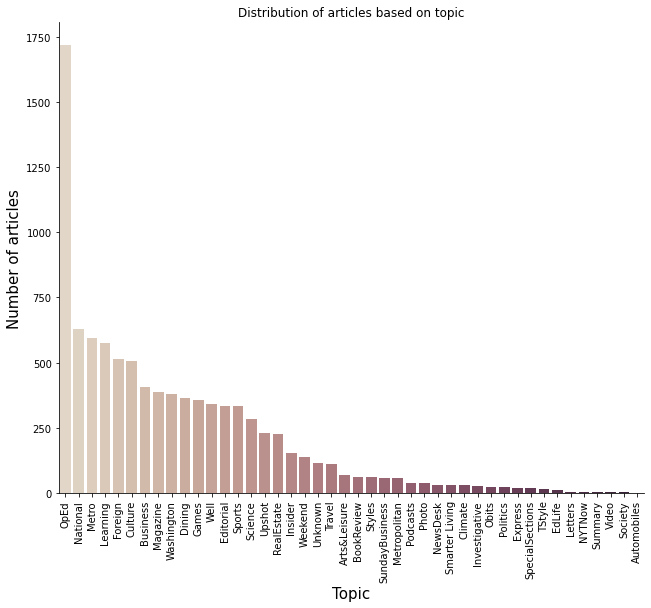

In [ ]:
plt.figure(figsize = (100,250))
sns.catplot(x="newDesk", kind="count", palette="ch:.25", data=articles_df, height=7.27, aspect=10.7/8.27, order=articles_df['newDesk'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Distribution of articles based on topic")
plt.xlabel('Topic', fontsize=15)
plt.ylabel('Number of articles', fontsize=15)


As you can see, the number of articles published concerning OpEd, National, Metro, Foreign, Learning and Culture dominate the distribution, while topics such as Society and Video are written about a much fewer amount of times. 



To gain a better idea of the distribution of topics that are much smaller in number (towards the tail end), we also plot the above plot using a log scale as can be seen below.

Text(-2.6999999999999957, 0.5, 'Number of articles')

<Figure size 7200x18000 with 0 Axes>

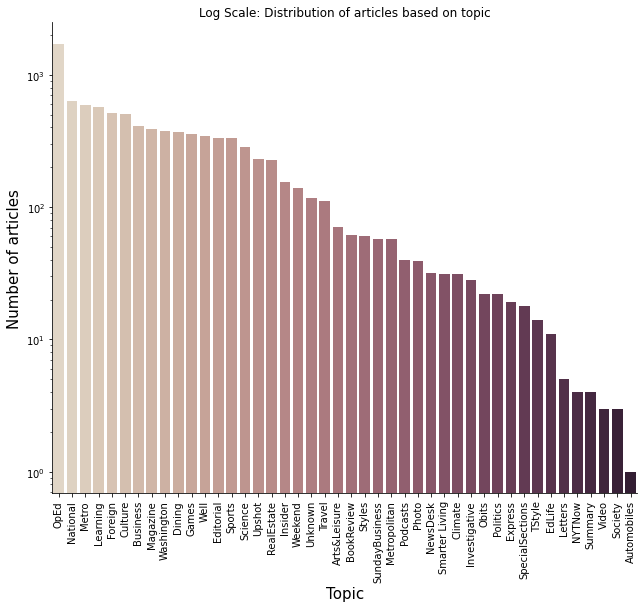

In [ ]:
plt.figure(figsize = (100,250))
ht= sns.catplot(x="newDesk", kind="count", palette="ch:.25", data=articles_df, height=7.27, aspect=10.7/8.27, order=articles_df['newDesk'].value_counts().index).set(yscale = 'log')
plt.xticks(rotation = 90)
plt.title("Log Scale: Distribution of articles based on topic")
plt.xlabel('Topic', fontsize=15)
plt.ylabel('Number of articles', fontsize=15)

:#### Distribution of the Number of Comments across Articles

The plot below shows how comments are distributed across articles. Most commonly, articles receive 0-10 comments. 

Text(0.5, 1.0, 'Log Scale: Distribution of the number of comments across articles')

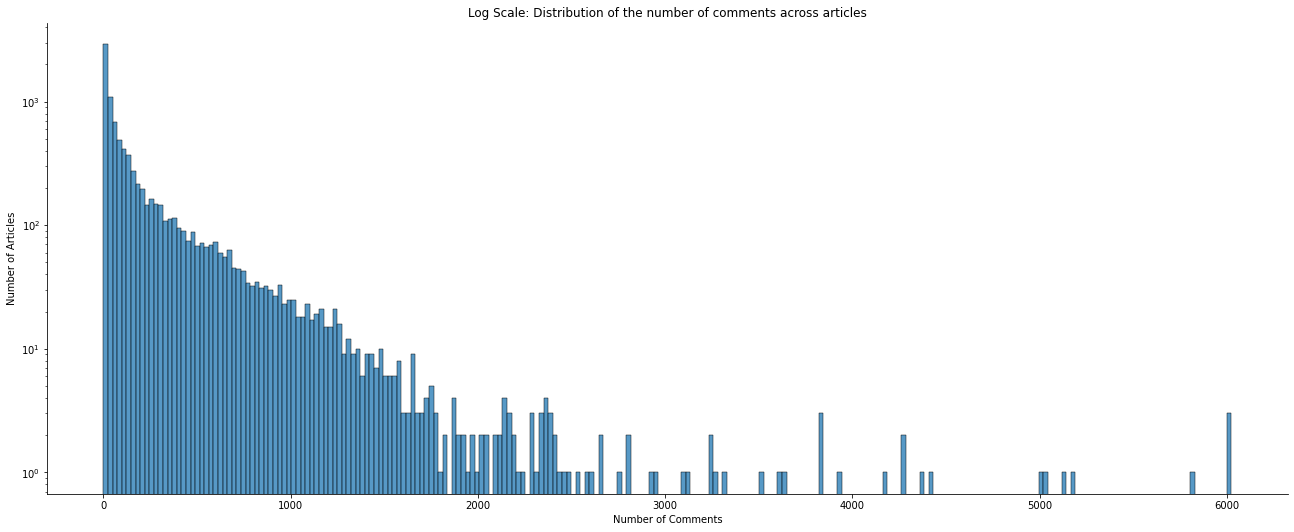

In [ ]:
grouped_comments = comments_df.groupby('articleID')
grouped_articles = pd.concat([grouped_comments.commentID.count(), grouped_comments.recommendations.median()], 
          axis=1).reset_index().rename(columns = {'commentID': 'commentsCount'})
articles = articles_df.merge(grouped_articles)

mpl.rcParams['figure.figsize'] = (16, 16)
sns.displot(articles.commentsCount, height=7.27, aspect=2.5).set(yscale = 'log')
plt.ylabel('Number of Articles')
plt.xlabel('Number of Comments')
plt.title("Log Scale: Distribution of the number of comments across articles")

#### Distribution of the Word Count across Articles

The plot below describes the average number of words across all articles. 

Text(0.5, 1.0, 'Distribution of the word count across articles')

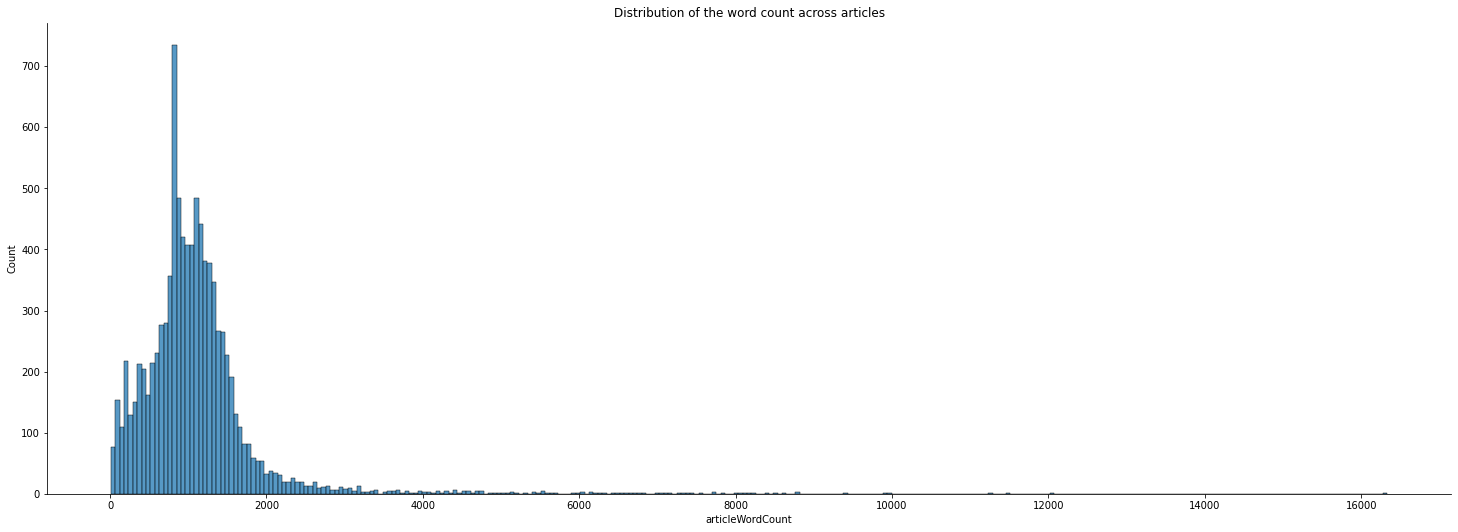

In [ ]:
sns.displot(articles.articleWordCount, height=7.27, aspect=2.8)
plt.title("Distribution of the word count across articles")

Text(0.5, 1.0, 'Log Scale: Distribution of the word count per article')

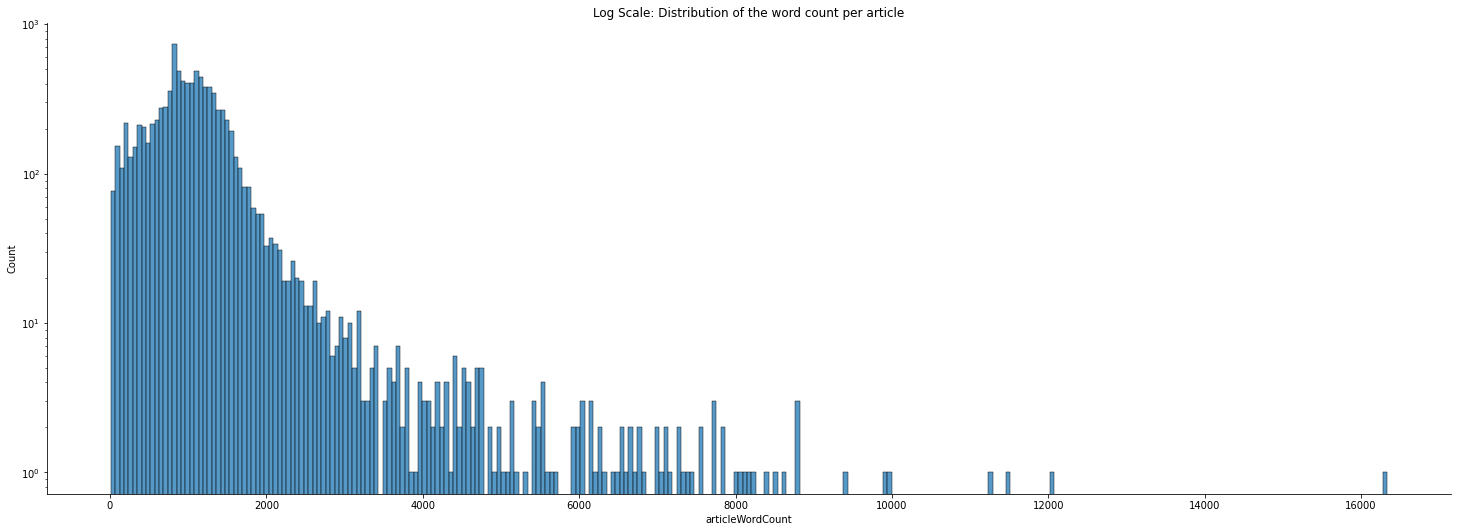

In [ ]:
sns.displot(articles.articleWordCount, height=7.27, aspect=2.8).set(yscale = 'log')
plt.title("Log Scale: Distribution of the word count per article")

#### Distribution of Upvotes for Comments across Articles


To plot the distribution, we use the median number of upvotes a comment receives for each article.

Text(0.5, 1.0, 'Distribution of Upvotes for Comments across Articles')

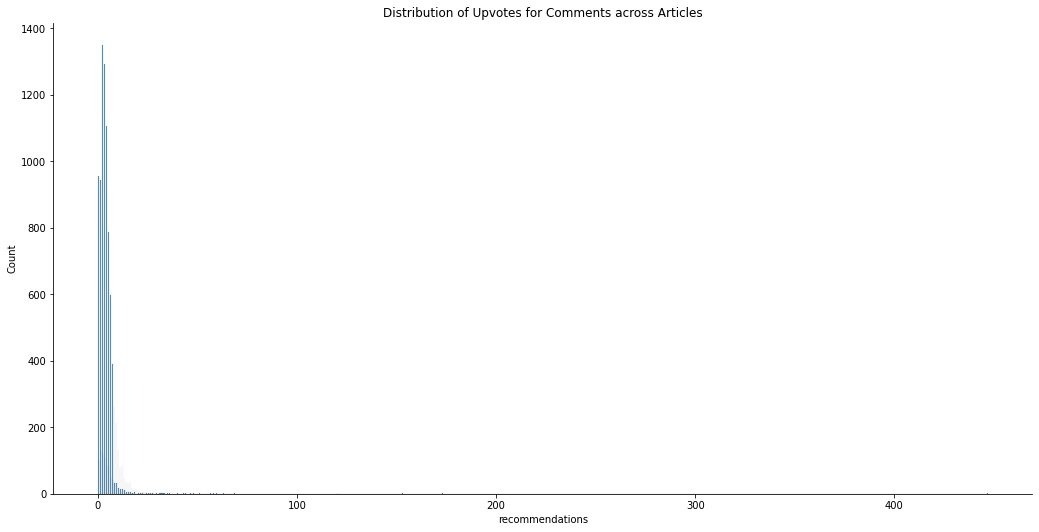

In [ ]:
sns.displot(articles.recommendations, height=7.27, aspect=2)
plt.title("Distribution of Upvotes for Comments across Articles")

Text(0.5, 1.0, 'Log Scale: Distribution of Upvotes for Comments across Articles')

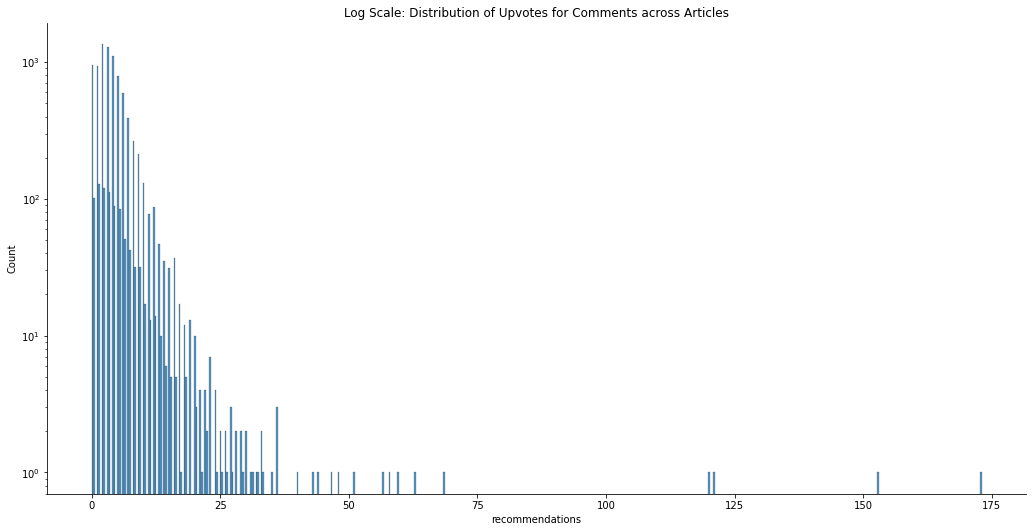

In [ ]:
articles_rec = articles.loc[articles.recommendations < 200]
sns.displot(articles_rec.recommendations, height=7.27, aspect=2).set(yscale = 'log')
plt.title("Log Scale: Distribution of Upvotes for Comments across Articles")

#### Number of Comments on Articles per Print Page

Each print page refers to the page number of the newspaper the article is printed on. We plot this distribution to visualize the number of comments an article receives depening on it's relative location in the paper.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text major ticklabel objects>)

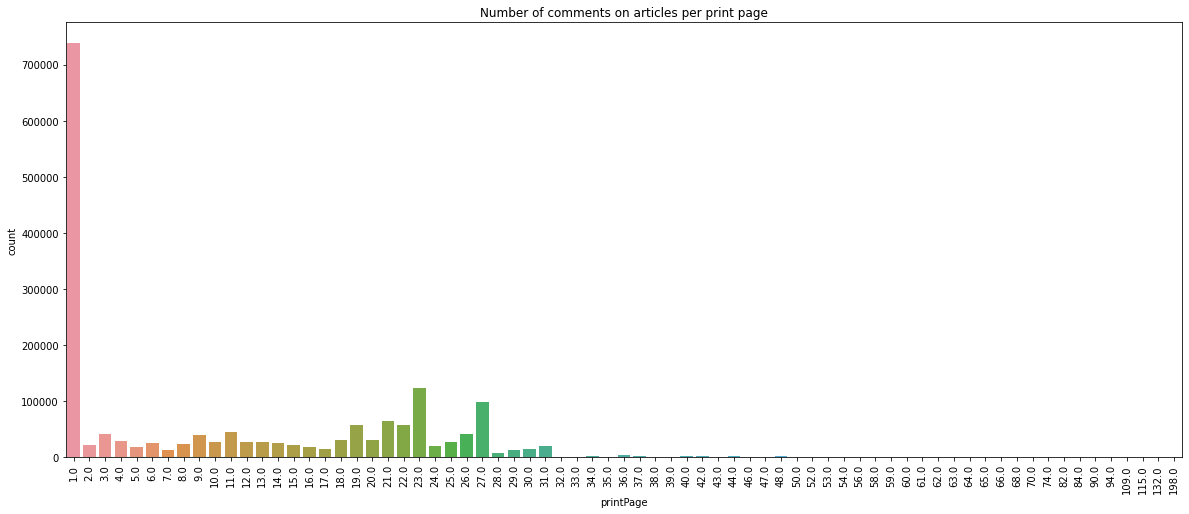

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x="printPage", data=comments_df[comments_df.printPage>0])
plt.title("Number of comments on articles per print page")
plt.xticks(rotation=90)

As can be seen, the most widely interacted with articles are those which are on page 1. Addtionally, page 23 and 27 have a decent amount of interaction, these pages usually correspond to the 'Sports' and 'Crosswords' page. 

#### Average Number of Upvotes for Comments based on Topics

Text(0, 0.5, 'Topic')

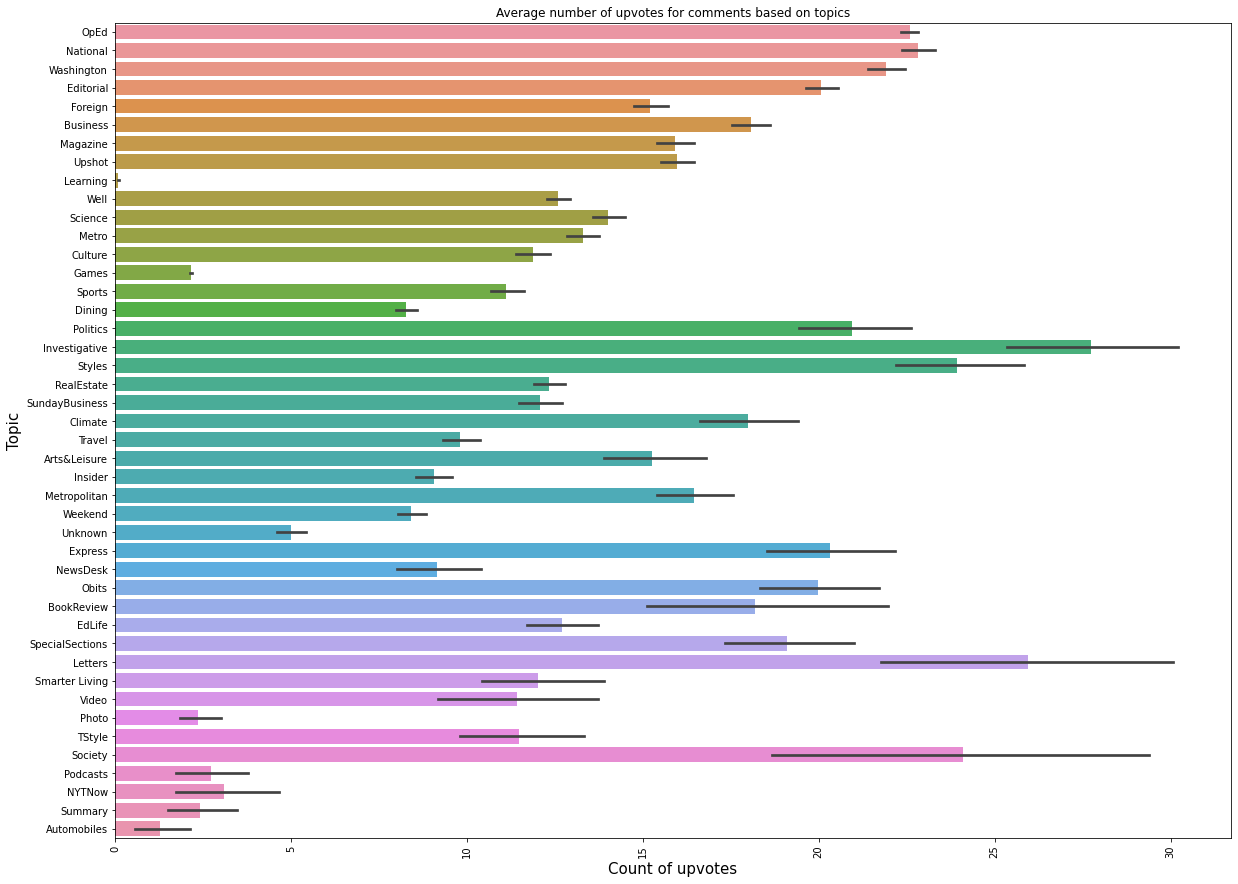

In [ ]:
plt.figure(figsize = (20,15))
sns.barplot(y='newDesk', x='recommendations', data=comments_df, order=comments_df.newDesk.value_counts().index)
plt.title("Average number of upvotes for comments based on topics")
plt.xticks(rotation=90)
plt.xlabel('Count of upvotes', fontsize=15)
plt.ylabel('Topic', fontsize=15)

The learning section receives nearly no engagement :(
OpEd and National dominate this field again, possibly related to the previous graph, since they are often articles printed on page 1 or 2. Investigative is an interesting topic that seems to receive a bunch of upvotes for comments, possibly as these topics tend to spark interest, speculation and discussions. 

#### Number of Comments per Topic

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

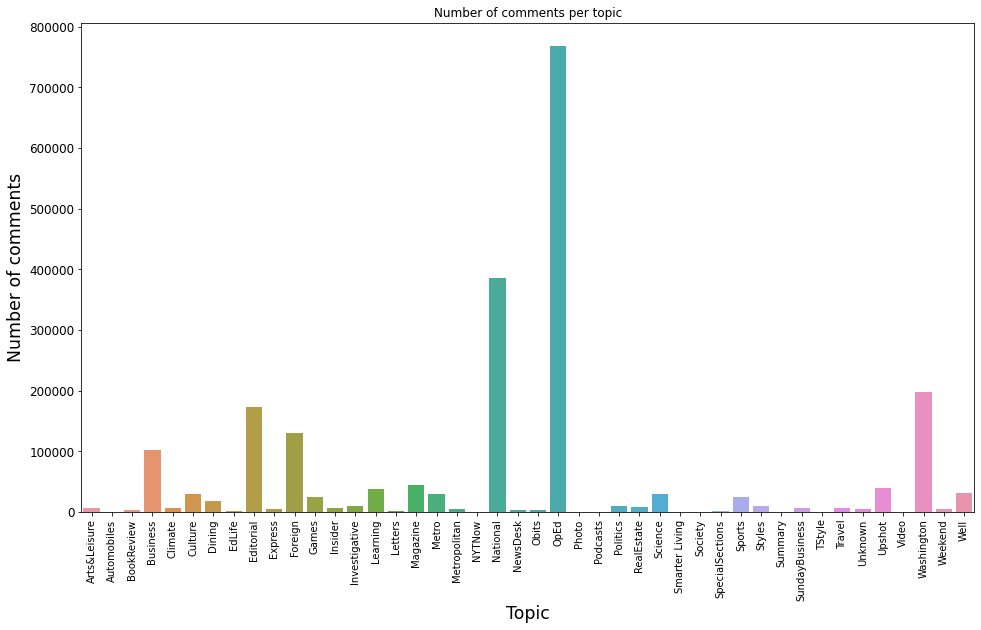

In [ ]:
mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'large'
comments_df_1 = comments_df.groupby('newDesk').count().reset_index()
sns.barplot(x="newDesk", y="commentBody", data=comments_df_1)
plt.ylabel("Number of comments")
plt.xlabel("Topic")
plt.title("Number of comments per topic")
plt.xticks(rotation=90)

####Location Based User Engagement 

As can be seen, NYC, NY, and New York take up the first few spots in the top 10 locations that receive most user engagement. This is due to user entered locations being different variations of the same location - we have dealt with this using string similarity - done in the section - 'Learning More About Location'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

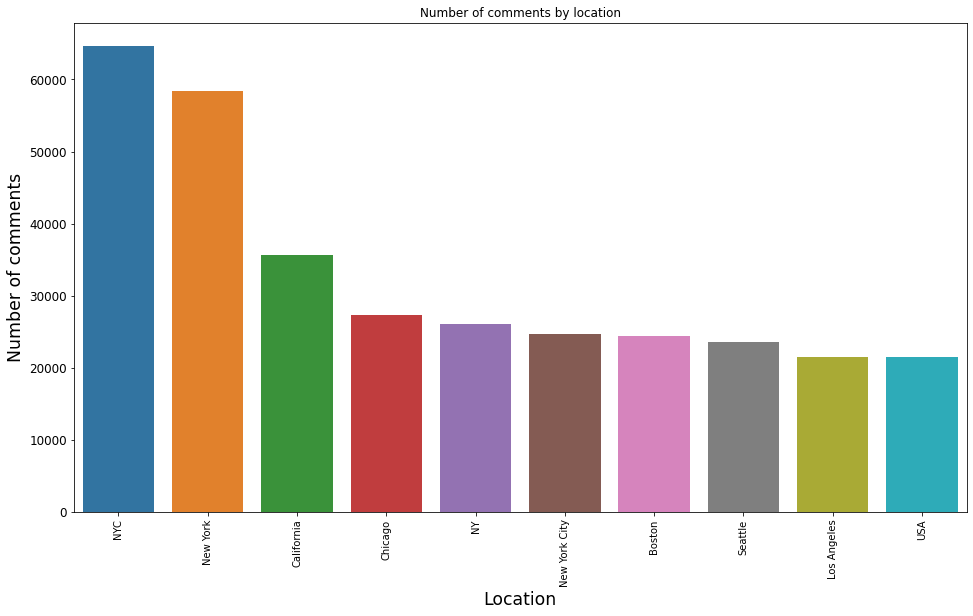

In [ ]:
mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'large'
comments_df_loc = comments_df.groupby('userLocation').count().reset_index()
comments_df_loc.sort_values(by = "commentBody", ascending=False, inplace=True)
sns.barplot(x="userLocation", y="commentBody", data=comments_df_loc.head(10))
plt.ylabel("Number of comments")
plt.xlabel("Location")
plt.title("Number of comments by location")
plt.xticks(rotation=90)

### Analysing Authors & Articles


So far, we had been considering comments made by users reading the article. On the flipside, we consider the authors of these articles, to understand reader behaviour in terms of the creators of these stories. 

#### Cleaning Author Names

We clean the names of authors so they're all in the same format, for further analysis. Some of the names are combined - since there are co authors in certain articles. Thus, to explore this data, we clean using RegEx, divide and explode. 

In [ ]:
best_author=articles_df.copy()
best_author[["byline"]]

,byline
0,By JENNIFER STEINHAUER
1,By MARK LANDLER
2,By CAITLIN LOVINGER
3,By JOCHEN BITTNER
4,By JIAYIN SHEN
...,...
9330,By DEB AMLEN
9331,By PAUL KRUGMAN
9332,By GINIA BELLAFANTE
9333,By BARBARA BOLTON


We use regular expressions (RegEx) to clean the data. 

In [ ]:
best_author["Author"] = best_author['byline'].str.findall(r'(\b[A-Z][A-Z]+|\b[A-Z]\b)')
for i in range(len(best_author)):
  arr=best_author["Author"][i].copy()
  if len(arr)==1:
    best_author.loc[i, 'Author']=arr[0].title()
  elif len(arr)==2:
    x=arr[0]+' '+arr[1]
    best_author.loc[i, 'Author']=x.title()
  elif len(arr)==3:
    x=arr[0]+' '+arr[1]+' '+arr[2]
    best_author.loc[i, 'Author']=x.title()
  elif len(arr)==4:
    x=arr[0]+' '+arr[1]+','+arr[2]+' '+arr[3]
    best_author.loc[i, 'Author']=x.title()
  else:
    best_author.loc[i, 'Author']=np.nan

In [ ]:
#Exploding the data

best_author['Author']=list(best_author['Author'].str.split(","))
best_author=best_author.explode('Author')
best_author=best_author.dropna( subset=['Author'])
best_author[['Author']]

,Author
0,Jennifer Steinhauer
1,Mark Landler
2,Caitlin Lovinger
3,Jochen Bittner
4,Jiayin Shen
...,...
9331,Paul Krugman
9332,Ginia Bellafante
9333,Barbara Bolton
9334,Hiroko Tabuchi


Converting pubDate to Datetime obj

In [ ]:
best_author=best_author[['Author','articleID','headline', 'keywords','newDesk','pubDate','typeOfMaterial','articleWordCount']].copy()
best_author['pubDate']=pd.to_datetime(best_author['pubDate'])
best_author['month'] = best_author['pubDate'].dt.month
best_author['year'] = best_author['pubDate'].dt.year

####Types of Articles in NYT

What type of material do NYT authors like writing about the most?
To do this we find out how many authors have contributed to each type of Material published, including the frequency with which they publish in that category.


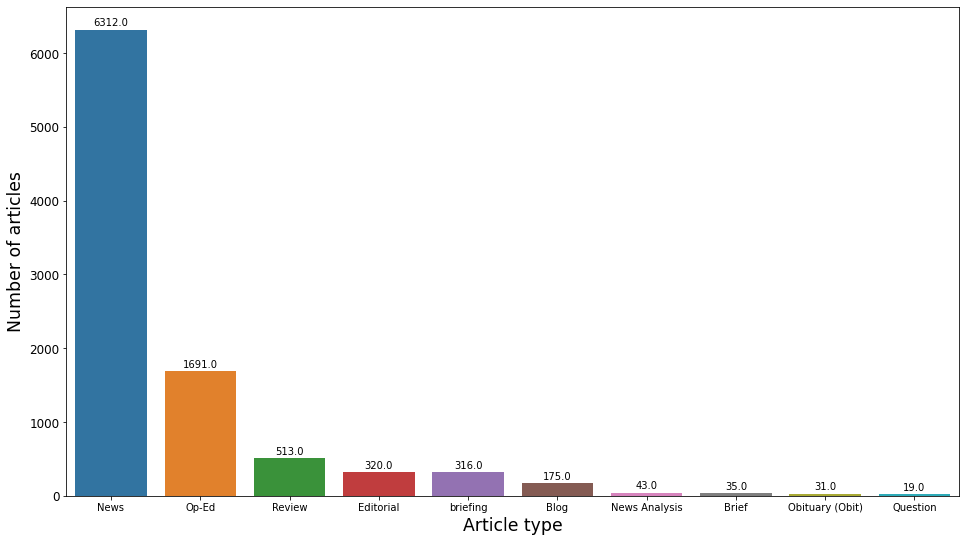

In [ ]:
material_graph= best_author[['Author','typeOfMaterial']].groupby(by=['typeOfMaterial']).count().reset_index()
material_graph=material_graph.sort_values(by='Author', ascending=False).head(10)
ax=sns.barplot(x='typeOfMaterial', y='Author', data=material_graph)
ax.set(xlabel='Article type', ylabel='Number of articles')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')

#### Author Reputation

One way to identify an efficient and good author is based on the number of articles published, after all a dedicated and experienced journalist would definitely have a lot of articles in their portfolio.

We group by authors, and use the count function to obtain the number of articles each author has written, sorted in descending order. 

In [ ]:
most_articles=best_author.groupby(["Author"]).count()
most_articles=pd.DataFrame(most_articles['articleID'])
most_articles=most_articles.rename(columns={"articleID":"Total_Articles"})
most_articles=most_articles.sort_values(by=['Total_Articles'], ascending=False).reset_index()
most_articles.head(10)

,Author,Total_Articles
0,Deb Amlen,269
1,The Editorial Board,258
2,Caroline Crosson Gilpin,187
3,Paul Krugman,113
4,Natalie Proulx,112
5,Nicholas Bakalar,106
6,Katherine Schulten,95
7,Ben Brantley,83
8,Jonathan Wolfe,82
9,Alexandra S Levine,77


But this doesn't consider the duration with which someone has worked for the NYT. So if we were to consider the number of months that the author has worked for the NYT, we can see how many articles a journalist is able to crank out per month. In that sense we could see that a journalist who is consistent in their publishing frequency is a positve asset.


In [ ]:
frequent_author= best_author.groupby(["Author",'month','year']).count().reset_index()
frequent_author=pd.DataFrame(frequent_author[["Author",'month','year']])
months_worked=pd.DataFrame(frequent_author['Author'].value_counts()).reset_index()
months_worked=months_worked.rename(columns={"index":"Author", "Author":"Months Worked"})
frequent_author = pd.merge(most_articles,months_worked,on='Author')
frequent_author['Avg Articles per month']= frequent_author['Total_Articles'] / frequent_author['Months Worked']
frequent_author=frequent_author.sort_values(by=['Avg Articles per month'], ascending=False)
frequent_author.head(10)

,Author,Total_Articles,Months Worked,Avg Articles per month
4,Natalie Proulx,112,4,28.000000
1,The Editorial Board,258,10,25.800000
0,Deb Amlen,269,11,24.454545
2,Caroline Crosson Gilpin,187,10,18.700000
11,Caitlin Lovinger,76,6,12.666667
5,Nicholas Bakalar,106,9,11.777778
3,Paul Krugman,113,10,11.300000
23,Liz Spayd,53,5,10.600000
6,Katherine Schulten,95,9,10.555556
35,Giovanni Russonello,39,4,9.750000


Another way to think about it is to consider which author is able to drive up engagement about the topic they are writing about. After all, the essense of a good writer should be how you can spark a debate, keep people reading and engaged!

This seems to give us the most likely estimate of which journalist is the most consistent and engaging writer in the pool.

In [ ]:
comments_author= comments_df[['articleID', 'commentID']].groupby(["articleID"]).count().reset_index()
comments_author= comments_author.rename(columns={"commentID":"Total_Comments"})
comments_author = pd.merge(best_author[['Author','articleID']],comments_author,on='articleID')
comments_author= comments_author[['Author','Total_Comments']].groupby(["Author"]).sum().reset_index()
comments_author = pd.merge(most_articles,comments_author,on='Author')
comments_author['Avg Comments per article']=comments_author['Total_Comments']/comments_author['Total_Articles']
comments_author=comments_author.sort_values(by=['Total_Comments'], ascending=False).reset_index(drop=True)
comments_author.head(10)

,Author,Total_Articles,Total_Comments,Avg Comments per article
0,The Editorial Board,258,153555,595.174419
1,Paul Krugman,113,71058,628.831858
2,Charles M Blow,64,57533,898.953125
3,David Brooks,72,56557,785.513889
4,Frank Bruni,74,48314,652.891892
5,Nicholas Kristof,77,41194,534.987013
6,Gail Collins,73,39657,543.246575
7,Ross Douthat,67,37027,552.641791
8,Peter Baker,45,31558,701.288889
9,Mark Landler,45,28659,636.866667


The authors are sorted based on the total comments received as opposed to the average comments as an author who might have only published one good article with many comments would perform unfairly better than an author who has published many articles and driven engagement up through multiple good articles.

While this does cover significant factors to determine the idea of a "good" author, we still haven't considered what type of sentiments their articles invoke in the publid, and what that shows about their writing style and topics. This is done in a later section using sentiment analysis.

####Popularity of Topics

The graph below helps us understand which sections of the New York Times receive the most number of comments by readers.

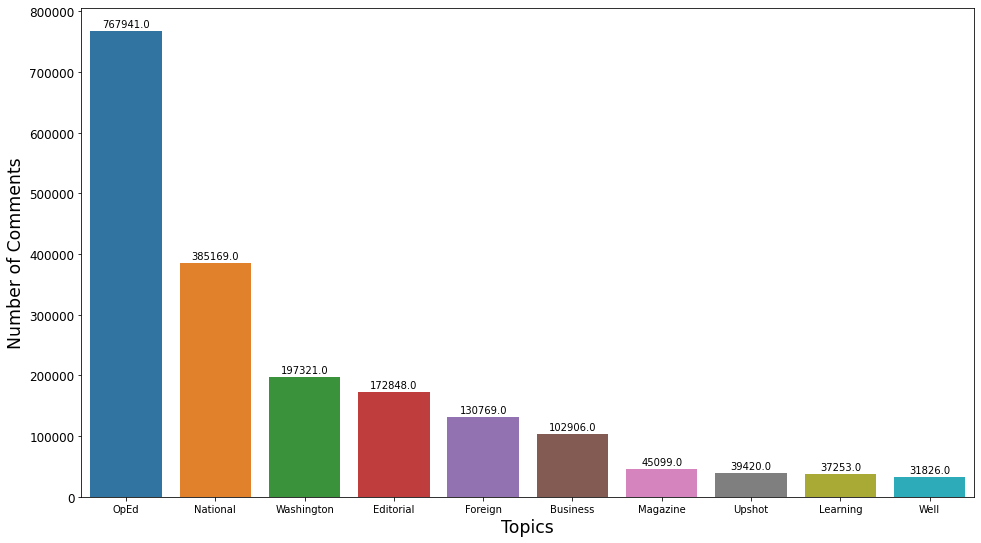

In [ ]:
comment_topic=comments_df[['commentID', 'newDesk']].groupby(by=['newDesk']).count().reset_index()
comment_topic=comment_topic.sort_values(by='commentID', ascending=False).head(10)
ax=sns.barplot(x='newDesk', y='commentID', data=comment_topic)
ax.set(xlabel='Topics', ylabel='Number of Comments')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')

### Topic Detection Word Clouds

Before we move on to modelling for topic detection, an initial analysis of the data allows us to describe in a visual format how comments on an article can bring out the topic of the article that the comments have been made about. 

We use the stopwords list as part of the nltk library, as well as a tokenizer, to get a list of words that encompass all the comments for a given article. Then, we clean these words to plot a Word Cloud to detect the basic topic of an article. 

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
def tokenize_it(x):
  all_words = []
  word_list=nltk.word_tokenize(x)
  for word in word_list:
    word=word.lower()
    if word not in stopwords:
      if  word.isalpha() is True:
        all_words.append(word)
  return all_words


#### Word Cloud I - Culture

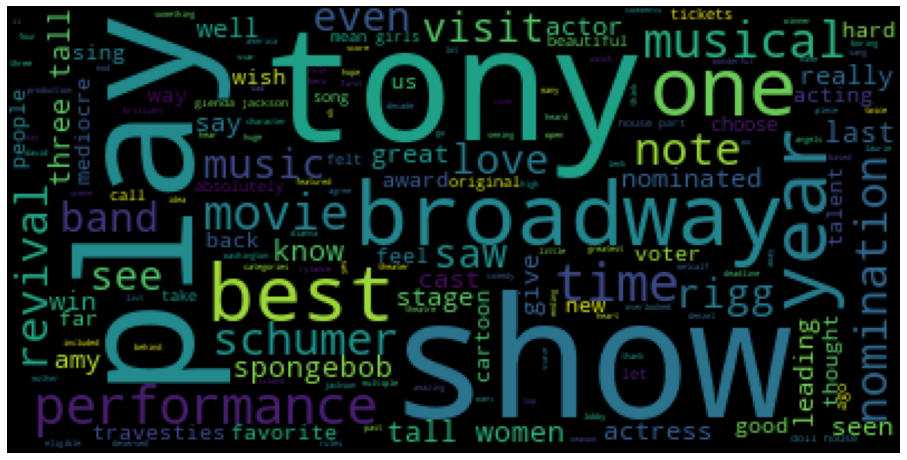

In [ ]:
test = comments_df[comments_df['articleID'] == '5ae82ca3068401528a2ab97a'] 
all_words=test["commentBody"].apply(tokenize_it)
all_words = [l for m in all_words for l in m]
wordcloud = WordCloud().generate(" ".join(all_words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This Word Cloud displays the most prominent terms for an article that has been marked as 'Culture' by the NYT. As you can see, 'Broadway', 'musical' , 'Tony', 'Play' and 'Show' are used very often in the comments, enabling us to detect of the topic.

####Word Cloud II - Politics

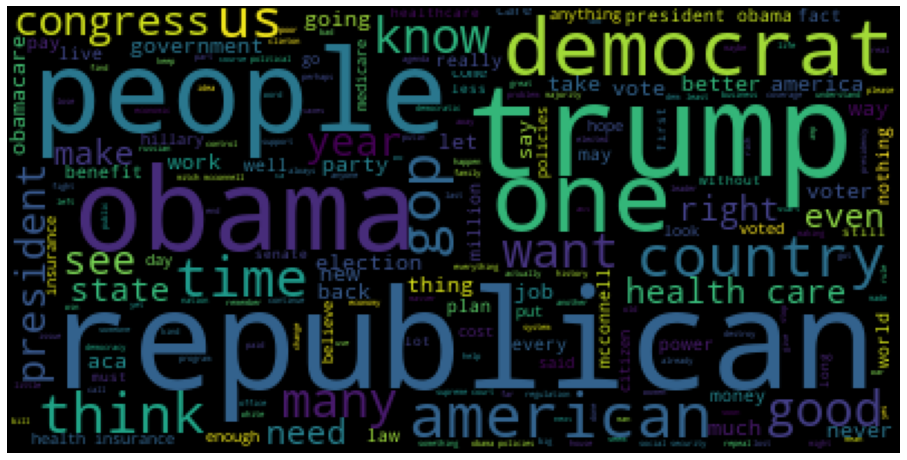

In [ ]:
test = comments_df[comments_df['articleID'] == '58691a5795d0e039260788b9'] 
all_words=test["commentBody"].apply(tokenize_it)
all_words = [l for m in all_words for l in m]
wordcloud = WordCloud().generate(" ".join(all_words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This Word Cloud displays the most prominent terms for an article that has been marked as 'Politics' by the NYT. The words that stick out are 'republican', 'trump', 'democrat' etc.

## Popularity Prediction of Comments using Upvotes

We now move on to the first machine-learning task which is to predict the popularity of comments based on the number of upvotes received. 

### Feature Engineering 

Feature engineering is the process of using domain knowledge to select and transform the most relevant variables from raw data so as to allow for efficient predictive modelling using machine learning or other statistical modeling techniques. 
This is an important pre-processing step that involves the manipulation of predictor variables that would ultimately result in improved model performance and accuracy.

#### Correlation Matrix
We initially plot a correlation matrix using the comments_df and observe the matrix to determine if there are signifcant linear relationships between some feature variables and others.

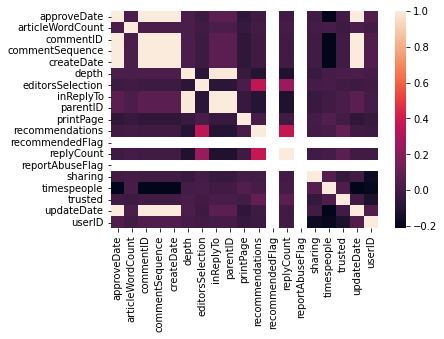

In [7]:
sns.heatmap(comments_df.corr())

From the given correlation matrix, it is evident that there is not much multicollinearity that exists within the dataset.

#### Split into Features and Label

Feature selection essentially involves one to analyze, judge, and rank various features to determine which features are irrelevant and should be removed, which features are redundant and should be removed, and which features are most useful for the model and should be prioritized.

For the prediction of the number of upvotes that a comment receives, we observe the features in the comments_df and select the ones which may logically seem to influence the number of upvotes received per comment. 

The chosen features are 'sectionName', 'typeOfMaterial', 'newDesk' and 'commentType'. These may be key factors which help identify the articles with greater readership and thereby determine the kind of engagement received in the comments section.

In [8]:
upvotes_features = comments_df[[ 
                'sectionName', 'typeOfMaterial', 'newDesk', 'commentType']]
upvotes_labels = comments_df[['recommendations']]

Additionally, we create a new feature called 'totalwords' which is the count of the number of words in a given comment. This may be useful as there could be a potential relationship between the length of a comment and its popularity amongst users. 

In [9]:
upvotes_features['totalwords'] = [len(x.split()) for x in comments_df['commentBody'].tolist()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
upvotes_features

,sectionName,typeOfMaterial,newDesk,commentType,totalwords
0,Politics,News,National,comment,115
1,Politics,News,National,comment,60
2,Politics,News,National,comment,72
3,Politics,News,National,comment,258
4,Politics,News,National,comment,3
...,...,...,...,...,...
2176359,Unknown,News,Foreign,userReply,7
2176360,Unknown,News,Foreign,userReply,19
2176361,Unknown,News,Foreign,userReply,9
2176362,Unknown,News,Foreign,userReply,91


#### Label Encoding for Categorical Variables using LabelEncoder

In this section, we will identify the categorical features that need to be converted into numerical values that can be processed by the machine learning models. There are 4 categorical variables that need to be encoded, commentType, newDesk, sectionName, and typeOfMaterial.
To perform this categorical encoding, we use the LabelEncoder in the sklearn package. 
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [10]:
le = LabelEncoder()
le.fit(comments_df.commentType)
list(le.classes_)
upvotes_features['commentType'] = le.fit_transform(comments_df.commentType)
upvotes_features.commentType

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0          0
1          0
2          0
3          0
4          0
          ..
2176359    2
2176360    2
2176361    2
2176362    2
2176363    2
Name: commentType, Length: 2176364, dtype: int64

In [11]:
le.fit(comments_df.newDesk)
upvotes_features['newDesk'] = le.fit_transform(comments_df.newDesk)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
le.fit(comments_df.sectionName)
upvotes_features['sectionName'] = le.fit_transform(comments_df.sectionName)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
le.fit(comments_df.typeOfMaterial)
upvotes_features['typeOfMaterial'] = le.fit_transform(comments_df.typeOfMaterial)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
upvotes_features.dropna(how='any',inplace=True)
upvotes_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sectionName,typeOfMaterial,newDesk,commentType,totalwords
0,46,7,20,0,115
1,46,7,20,0,60
2,46,7,20,0,72
3,46,7,20,0,258
4,46,7,20,0,3
...,...,...,...,...,...
2176359,59,7,10,2,7
2176360,59,7,10,2,19
2176361,59,7,10,2,9
2176362,59,7,10,2,91


#### Split Data into Train and Test Data

Now that the features are selected and stored in the desired format, we prepare the data for training and testing the different machine learning models. 
Using sklearn's train_test_split library, we split the data into train and test sets, the split is an 80-20 split, meaning, 80% for training and the rest for testing. The random_state parameter is set to 42 and the resulting splits are stored in separate variables.

In [15]:
upvotes_x_train, upvotes_x_test, upvotes_y_train, upvotes_y_test = train_test_split(upvotes_features, upvotes_labels, test_size=0.2, random_state=42)

### Machine Learning Modelling
We will now train a LinearRegression and a KNeighbourRegressor model using sklearn's inbuilt packages, given our training datasets. We will compare the errors and accuracy scores to determine which is a better option for prediction of the number of upvotes

#### Linear Regression

We start off with one of the oldest machine learning models, namely Linear Regression, to make predictions of the number of upvotes which may be considered a continuous variable.

The linear model is fit using the training data and predictions are then made on the test data
For logical soundness, we round the value of the predictions so that the resultant number of predicted upvotes may be an integer value.


In [16]:
reg = LinearRegression().fit(upvotes_x_train, upvotes_y_train)

In [17]:
upvotes_pred = np.around(reg.predict(upvotes_x_test))

In [18]:
lr_mae = mean_absolute_error(upvotes_y_test["recommendations"].to_list(),upvotes_pred)
lr_mse = mean_squared_error(upvotes_y_test["recommendations"].to_list(),upvotes_pred)
lr_rmse = math.sqrt(lr_mse)
print("Mean Absolute Error: ",lr_mae)
print("Mean Squared Error: ", lr_mse)
print("Root Mean Squared Error: ", lr_rmse)

Mean Absolute Error:  25.888187413416407
Mean Squared Error:  10994.569249643328
Root Mean Squared Error:  104.85499153422944


In [19]:
#fs = f1_score(upvotes_y_test["recommendations"].to_list(),upvotes_pred)
#acc = accuracy_score(upvotes_y_test["recommendations"].to_list(),upvotes_pred)
print(accuracy_score(upvotes_y_test["recommendations"].to_list(),upvotes_pred))

0.03832307540325267


We will now evaluate the coefficient of determination of the prediction.

The coefficient of determination $R^2$
is defined as 
$ (1 - \frac{u}{v} )$

where, 
$u$ is the residual sum of squares ((y_true - y_pred)** 2).sum() and $v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 

In [ ]:
print("Linear Regression Score:",reg.score(upvotes_x_test,upvotes_pred))

Linear Regression Score: 0.9993205569901119


#### K Neighbours Regression

The next model we will use for this task is the K Neighbours Regression which performs regression based on k-nearest neighbors. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

The prodecure to be followed is similar to that previously defined for Linear Regression. The model is initially fit on the training dataset and then evaluated on the test dataset.

We will then estimate the performance using the standard error measures.

In [21]:
knr = KNeighborsRegressor().fit(upvotes_x_train, upvotes_y_train)
upvotes_pred_knr = knr.predict(upvotes_x_test)

In [22]:
knn_mse = mean_squared_error(upvotes_y_test, upvotes_pred_knr)
knn_mae = mean_absolute_error(upvotes_y_test, upvotes_pred_knr)
knn_rmse = math.sqrt(knn_mse)

print("Mean Absolute Error: ",knn_mae)
print("Mean Squared Error: ", knn_mse)
print("Root Mean Squared Error: ", knn_rmse)
print("Accuracy:", accuracy_score(upvotes_y_test["recommendations"].to_list(),upvotes_pred))

Mean Absolute Error:  30.307815095353945
Mean Squared Error:  14386.553996779037
Root Mean Squared Error:  119.9439619021276
Accuracy: 0.03832307540325267


#### Binary Classification based on Upvotes Count

Due to the uneven distribution of the number of upvotes per comment, we will now illustrate a binary classification of comments based of the number of upvotes received. For comments that have greater than 4 upvotes, we categorise them as popular comments, and those that fall below this threshold are considered not so popular comments.

We assign binary classes based on this criteria where '1' denotes a popular comment and '0' denotes an unpopular comment.
The .apply() function is used to perform this tranformation across all instances of the data in the 'recommendations' column.

In [23]:
upvotes_thresholded_labels = upvotes_labels
upvotes_thresholded_labels['recommendations'] = comments_df.apply(lambda comments_df: 1 if comments_df['recommendations'] >= 4 else 0, axis = 1)
upvotes_thresholded_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,recommendations
0,1
1,0
2,0
3,0
4,0
...,...
2176359,0
2176360,0
2176361,0
2176362,0


Since the data has now been labelled differently, we will once again call the train_test_split function to produce the training and test datasets.

In [24]:
upvotes_x_train_1, upvotes_x_test_1, upvotes_y_train_1, upvotes_y_test_1 = train_test_split(upvotes_features, upvotes_thresholded_labels, test_size=0.2, random_state=42)

#### Categorical Naive Bayes

Since the recommendations label is now a discrete variable, we will use a classification model for our predictions. 

Naïve Bayes classifiers are a family of probabilistic classifiers based on Bayes Theorem with a strong assumption of independence between the features. These are not only fast and reliable but also simple and easy classifiers. Despite its simplicity, it gives accurate predictions in many machine learning problems.

For the task at hand, we define a Categorical Naive Bayes classifier which assumes categorically distribution of data. It is fit on the newly created training dataset and then used to make predictions on the testing dataset.

In [25]:
cnb = CategoricalNB().fit(upvotes_x_train_1, upvotes_y_train_1)
upvotes_pred_1 = cnb.predict(upvotes_x_test_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cnb_mae_1= mean_absolute_error(upvotes_y_test_1["recommendations"].to_list(),upvotes_pred_1)
cnb_mse_1 = mean_squared_error(upvotes_y_test_1["recommendations"].to_list(),upvotes_pred_1)
cnb_rmse_1 = math.sqrt(cnb_mse_1)
print("Mean Absolute Error: ",cnb_mae_1)
print("Mean Squared Error: ", cnb_mse_1)
print("Root Mean Squared Error: ", cnb_rmse_1)

Mean Absolute Error:  0.32865580911290154
Mean Squared Error:  0.32865580911290154
Root Mean Squared Error:  0.573285102817875


The performance of a classification model can be estimated based on the F1 score and the Accuracy which are standard benchmarks.

Accuracy measures the ratio of the correctly classified observations, both positive and negative.


> $ Accuracy = \frac{tp + tn}{tp + tn + fp + fn}$




The F1 score, also known as balanced F-score or F-measure, can be interpreted as a harmonic mean of the precision and recall.


> $ F1 = 2 * \frac{precision * recall}{precision + recall} $

where

> $Precision = \frac{tp}{tp + fp} $

> $Recall = \frac{tp}{tp + fn}$

In [26]:
cnb_f1_score = f1_score(np.array(upvotes_y_test_1["recommendations"]), upvotes_pred_1)
print("F1 Score: ",cnb_f1_score)
cnb_accuracy_score = accuracy_score(upvotes_y_test_1, upvotes_pred_1)
print("Accuracy Score: ",cnb_accuracy_score)

F1 Score:  0.7183862452089932
Accuracy Score:  0.6713441908870984


Thus, it can be seen that the utilization of a binary classifier is a more efficient machine learning model for the prediction of upvotes for comments as compared to the regression model used in the previous section.

Given this specific dataset, it seems more feasible to use the process of classification that learns a decision boundary to split the data into the different categories, in this case, popular vs non-popular votes.

##Predicting Editor's Pick
The NYT comments dataset that we are using contains a collection of comments' text along with multiple features,one of which is the feature editorsSelection. This feature indicates whether a comment is picked by NYT as an editor's selection or not. Two classifiers are trained to predict the probablities of comments being selected as NYT's picks.

We first consider the distribution of comments that are handpicked by the editor. We plot a pie chart to get an idea of the proportion of comments that make the editor's cut.

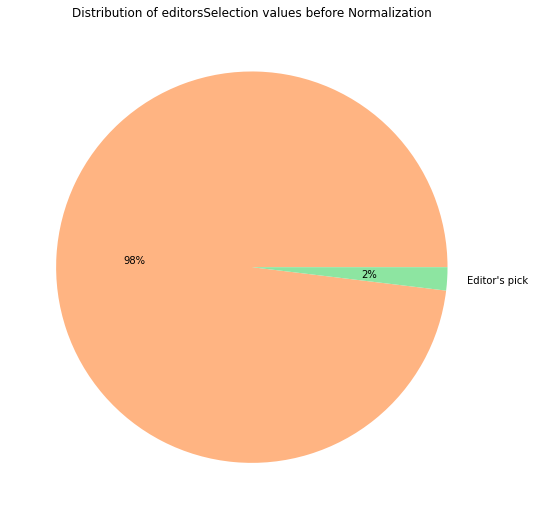

In [ ]:
plt.pie(comments_df.editorsSelection.value_counts(), labels = ("", "Editor's pick"), colors = sns.color_palette('pastel')[1:3], autopct='%.0f%%')
plt.title("Distribution of editorsSelection values before Normalization");
plt.show()

As can be seen, only 2% of the comments are picked by the editor. While this is representative of actual conditions (only a few comments get noticed/selected by editors), this won't enable us to predict these values accurately, which is why we need to move along to the next section where we resample the data. 

###Resampling the Data - Downsampling

As seen above, the data is skewed with respect to the classes in the editorsSelection column. This imbalance will be problematic for the model as it will train on the vast majority of negative instances relative to the insufficient number of positive instances.
This can be overcome by training on a disproportionately low subset of the majority class.

We resample the data to reduce the disparity between the number of comments picked by the editor vs those that are not. This is done by downsampling the data to a new subset where the values of editorsSelection are more evenly distributed.

In [ ]:
def normalize(comments):
    editorsSelection = comments.loc[comments.editorsSelection == True]
    n = round(editorsSelection.shape[0])
    if n:        
        try:
            notEditorsSelection = comments.loc[comments.editorsSelection == False].sample(n)
        except: 
            notEditorsSelection = comments.loc[comments.editorsSelection == False]
        return pd.concat([editorsSelection, notEditorsSelection])
    return None 

normalized_comments = comments_df.groupby('articleID').apply(normalize).reset_index(drop=True)
normalized_comments

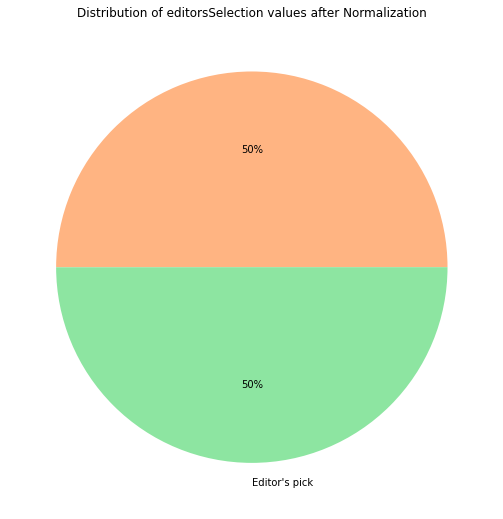

In [ ]:
plt.pie(normalized_comments.editorsSelection.value_counts(), labels = ("", "Editor's pick"), colors = sns.color_palette('pastel')[1:3], autopct='%.0f%%')
plt.title("Distribution of editorsSelection values after Normalization");
plt.show()

In [ ]:
editors_x_train, editors_x_test, editors_y_train, editors_y_test = train_test_split(normalized_comments.commentBody, normalized_comments.editorsSelection, test_size=0.2, random_state=42)

###TF - IDF Vectorizer

TF-IDF, which is an abbreviation for term frequency–inverse document frequency, is a numeric measure used to score the importance of a word in a document/string based on frequency of appearance.
The math formula for this measure is:


$ tf-idf(t,d,D) = tf(t,d) × idf(t,D)$


The first part of the formula tf(t,d) calculates the number of times each word appeared in a given text.

Inverse Document Frequency is a log of the ratio of the number of all documents/string in the corpus to the number of documents with term t_i. 

We use the comment body to predict whether a given comment will be picked up by the editor or not. This is achieved using the TF - IDF vectorizer which converts the raw text into a matrix of TF-IDF features.
The analyzer used is 'word' which implies that the features will be constituted of word n-grams namely unigrams and bigrams, as specified in the ngram_range of (1,2).
The model is fit below.

In [ ]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    max_features=600,
    ) 

vectorizer.fit(normalized_comments.commentBody)

In [ ]:
train_text = vectorizer.transform(editors_x_train)
test_text = vectorizer.transform(editors_x_test)

###Logistic Regression

We define the logistic regression model below - using Elastic Net (which is why we use penalty = 'elasticnet'.

We fit the classifier on the train data - train_text (x_train) and editors_y_train (y_train). 

In [ ]:
lr_classifier = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5)
lr_classifier.fit(train_text, editors_y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

We now use the classifier to predict on the test data, and comput the following measures of performance - the accuracy score, the f1 score as well as plot the confusion matrix.

In [ ]:
preds = lr_classifier.predict(test_text)
print("Accuracy Score: ", accuracy_score(editors_y_test, preds))
print("F1 Score:", f1_score(editors_y_test, preds))
print("Confusion Matrix:", confusion_matrix(editors_y_test, preds))

Accuracy Score:  0.6622962651109641
F1 Score: 0.6722698885192319
Confusion Matrix: [[5253 3060]
 [2555 5759]]


The number of true Positives, and true negatives are more than the number of false positives and negatives, but not by a large amount, which is why the F1 score is still not much higher than 0.5.

###Random Forest Classifier 

We would like to compare the difference in performance of different models, so our next task was to use a somewhat ensemble method - the random forest classifier, which combines decision trees on different subsets of the data to improve performance.

In [ ]:
#Defining the classifier
rf_classifier = RandomForestClassifier(n_estimators=40)

#Fitting the classifer
rf_classifier.fit(train_text, editors_y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
preds = rf_classifier.predict(test_text)
print("Accuracy Score: ", accuracy_score(editors_y_test, preds))
print("F1 Score:", f1_score(editors_y_test, preds))
print("Confusion Matrix:", confusion_matrix(editors_y_test, preds))

Accuracy Score:  0.6562218079028087
F1 Score: 0.6634083146861383
Confusion Matrix: [[5278 3035]
 [2681 5633]]


###Decision Tree Classifier

We have also worked with a decision tree classifier, to compare the performance between all the 3 models. However, as can be seen, the performance imporvement is not much in either of the two models after LR. 

The reason for the an accuracy score that is not too impressive could be accounted by the fact that the tf-idf score alone is not enough for predicting the editor's pick as this data is not feature rich enough to make a prediction.

In [ ]:
rf_dt = tree.DecisionTreeClassifier(random_state=42, max_depth=4)
rf_dt.fit(train_text, editors_y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
preds = rf_dt.predict(test_text)
print("Accuracy Score: ", accuracy_score(editors_y_test, preds))
print("F1 Score:", f1_score(editors_y_test, preds))
print("Confusion Matrix:", confusion_matrix(editors_y_test, preds))

Accuracy Score:  0.6292175377398208
F1 Score: 0.676088898229391
Confusion Matrix: [[4028 4285]
 [1880 6434]]


##Sentiment Analysis


Now moving on to sentiment analysis. We will be using Sentiment Intensity Analyzer to determine the nature of the comments. The sentiment analyser gives a score in the range of -1 to 1, with with 0 being a completely neutral comment, and the -1 and 1 being a completely negative and positive comment respectively. 

In [ ]:
def sentiment_give(x):
  val=sentiment.polarity_scores(" ".join(x))['compound']
  return val

We first take each comment text from the comment body from the dataframe and we then row-wise tokenize it using the tokenize_it function we had used for the Word Cloud. This is saved in a new column which contains the list of tokenized words for that comment. This will be helpful if we want to do furthur analysis on tokenized words since it a computationally taxing operation.

After we have tokenized each comment, we run this through the sentiment analyzer to get a polarity score which indicates the nature of the sentiment, and we save this in another column. 

In [ ]:
retrain=False

if retrain==True:
  sentiment_df=comments_df.copy()
  sentiment = SentimentIntensityAnalyzer()
  sentiment_df['Tokenized_comments']=sentiment_df['commentBody'].apply(tokenize_it)
  sentiment_df['Sentiment_Score']=sentiment_df['Tokenized_comments'].apply(sentiment_give)
  #sentiment_df.to_csv('sentiment_analysis_temp.csv')
  #files.download('sentiment_analysis_temp.csv')

else:
  sentiment_df=pd.read_csv("sentiment_analysis.csv", index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Here to allow us to run further analysis on the dataset without it crashing, we stored the sentiment output to a csv which we have uploaded in the same drive link that the data is stored. When retain is set to False, it just loads the csv of the sentiment analysis we had done before.

When retrain is set to True, the code we used to create sentiment df runs again and the values can be stored in the drive by uncommenting the two lines in the if condition. 


With this we now have a sentiment score for each comment in the dataset, and can add in the sentiment of the public to the equation!

In [ ]:
sentiment_df

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,replyCount,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,typeOfMaterial,Tokenized_comments,Sentiment_Score
0,1483455908,58691a5795d0e039260788b9,1324.0,For all you Americans out there --- still rejo...,20969730.0,20969730.0,comment,1.483426e+09,1.0,0,0.0,National,0.0,NaN,20969730,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,0.0,Politics,0,approved,1.0,0.0,1483455908,N. Smith,64679318.0,New York City,NaN,News,"['americans', 'still', 'rejoicing', 'majority'...",0.9732
1,1483455656,58691a5795d0e039260788b9,1324.0,Obamas policies may prove to be the least of t...,20969325.0,20969325.0,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969325,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,0.0,Politics,0,approved,1.0,0.0,1483455656,Kilocharlie,69254188.0,Phoenix,NaN,News,"['obamas', 'policies', 'may', 'prove', 'least'...",-0.7906
2,1483455655,58691a5795d0e039260788b9,1324.0,Democrats are comprised of malcontents who gen...,20969855.0,20969855.0,comment,1.483431e+09,1.0,0,0.0,National,0.0,NaN,20969855,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,0.0,Politics,0,approved,1.0,0.0,1483455655,Frank Fryer,76788711.0,Florida,NaN,News,"['democrats', 'comprised', 'malcontents', 'gen...",0.8360
3,1483455653,58691a5795d0e039260788b9,1324.0,The picture in this article is the face of con...,20969407.0,20969407.0,comment,1.483419e+09,1.0,0,0.0,National,0.0,NaN,20969407,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,0.0,Politics,0,approved,1.0,0.0,1483455653,James Young,72718862.0,Seattle,NaN,News,"['picture', 'article', 'face', 'congressional'...",-0.1930
4,1483455216,58691a5795d0e039260788b9,1324.0,Elections have consequences.,20969274.0,20969274.0,comment,1.483417e+09,1.0,0,0.0,National,0.0,NaN,20969274,https://graphics8.nytimes.com/images/apps/time...,1.0,3.0,0.0,Politics,0,approved,1.0,0.0,1483455216,M.,7529267.0,Seattle,NaN,News,"['elections', 'consequences']",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176359,1496428934,5930ae877c459f24986e2f33,1176.0,C'mon Connecticut...let's add ourselves to the...,22713248.0,22713248.0,userReply,1.496427e+09,2.0,0,22711384.0,Foreign,22711384.0,Katy,22711384:22713248,http://graphics8.nytimes.com/images/apps/times...,12.0,2.0,0.0,Unknown,1,approved,1.0,0.0,1496428934,pmulberry,3771862.0,"Cornwall, CT",NaN,News,"['connecticut', 'let', 'add', 'list']",0.0000
2176360,1496439983,5930ae877c459f24986e2f33,1176.0,Write or call Hickenlooper's office! It was on...,22715167.0,22715167.0,userReply,1.496439e+09,2.0,0,22711384.0,Foreign,22711384.0,Katy,22711384:22715167,http://graphics8.nytimes.com/images/apps/times...,12.0,2.0,0.0,Unknown,0,approved,1.0,0.0,1496439983,geez,63494752.0,Boulder,NaN,News,"['write', 'call', 'hickenlooper', 'office', 'o...",0.0000
2176361,1496452744,5930ae877c459f24986e2f33,1176.0,"C'mon North Carolina! -- oh, who am I kidding.",22716312.0,22716312.0,userReply,1.496453e+09,2.0,0,22711384.0,Foreign,22711384.0,Katy,22711384:22716312,http://graphics8.nytimes.com/images/apps/times...,12.0,2.0,0.0,Unknown,0,approved,1.0,1.0,1496452744,Liz,28028109.0,Raleigh,NaN,News,"['north', 'carolina', 'oh', 'kidding']",0.1027
2176362,1496451596,5930ae877c459f24986e2f33,1176.0,"California is the federal government's #1 ""don...",22716238.0,22716238.0,userReply,1.496452e+09,2.0,0,22711373.0,Foreign,22711373.0,Jane,22711373:22716238,https://s3.amazonaws.com/pimage.timespeople.ny...,12.0,3.0,0.0,Unknown,0,approved,1.0,0.0,1496451596,CarissaV,72050670.0,<br/>,NaN,News,"['california', 'federal', 'government', 'donor...",0.9081


###Sentiment Analysis and Topics

One way to use sentiment analysis is to figure out how the public reacts to different topics and how certain topics tend to bring out certain emotions in people.



####Most Positive Article Types
So, if we wanted to find which topics bring out the most encouraging or positive comments we simply need to group the dataframe by the topics in newDesk, and get the count of the comments and the average sentiment score for that topic. We then sort them in descending order to get the most positively recieved topics

A lower cap of 5000 comments was put since we noticed that some topics which have overall lesser comments have much better Sentiment Scores due to their small sample size. After a bit of trial and error, and judgement on our part, we determined that a lower cap of 5000 comments worked best for the sentiment analysis module

In [ ]:
topic_sentiment_plus=sentiment_df[['commentID','newDesk','Sentiment_Score']].groupby(by=['newDesk']).agg({'commentID':'count', 'Sentiment_Score':'mean'}).reset_index()
topic_sentiment_plus=topic_sentiment_plus.loc[topic_sentiment_plus['commentID']>5000]
topic_sentiment_plus=topic_sentiment_plus.sort_values(by='Sentiment_Score', ascending=False)
topic_sentiment_plus.head(10)

,newDesk,commentID,Sentiment_Score
6,Dining,18135,0.398463
37,Travel,6746,0.395589
33,Styles,9481,0.392691
42,Weekend,5540,0.373166
11,Games,25275,0.359046
0,Arts&Leisure,6730,0.327799
27,RealEstate,7956,0.293215
18,Metropolitan,5558,0.289246
5,Culture,28941,0.251324
14,Learning,37253,0.241226


Dining, Travel, Styles, and Weekend all do sound to be relatively positive sentiment related topics and are more on the non controversial end

####Most Negative Article Types
Similarly to figure out which topics receive the most negative and have more critical comments we need to again group by newDesk and get the count and mean of the comments and Sentiments respectively. 

Only here we arrange them in Ascending order in order to figure out the lowest Sentiment score averages. Again a lower cap of 5000 comments was put since it skews the results unfairly.

In [ ]:
topic_sentiment_neg=sentiment_df[['commentID','newDesk','Sentiment_Score']].groupby(by=['newDesk']).agg({'commentID':'count', 'Sentiment_Score':'mean'}).reset_index()
topic_sentiment_neg=topic_sentiment_neg.loc[topic_sentiment_neg['commentID']>5000]
topic_sentiment_neg=topic_sentiment_neg.sort_values(by='Sentiment_Score', ascending=True)
topic_sentiment_neg.head(10)

,newDesk,commentID,Sentiment_Score
10,Foreign,130769,-0.007565
41,Washington,197321,0.028696
20,National,385169,0.035559
8,Editorial,172848,0.058852
4,Climate,7096,0.062434
38,Unknown,5204,0.065224
13,Investigative,10665,0.081471
26,Politics,10669,0.103212
23,OpEd,767941,0.104330
3,Business,102906,0.117306


Someone doesnt like Washington huh

##Distributed ML using Spark

To improve our performance on our predictive model, we would like to incorporate a new feature, which is the sentiment. However, considering the computation of this is much more efficient on a larger dataset using Spark, we have decided to use spark to create an important feature.


###Installing Configuration Files
We update and install the required configuration files.

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 37 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packa

In [ ]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
--2021-12-14 07:26:29--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz.10’

spark-3.1.2-bin-had 100%[===================>] 218.23M  23.7MB/s    in 9.9s    

2021-12-14 07:26:39 (22.0 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz.10’ saved [228834641/228834641]

     |████████████████████████████████| 43 kB 824 kB/s 
     |████████████████████████████████| 154 kB 10.5 MB/s 
     |████████████████████████████████| 

In [ ]:
!pip install sparkmagic

This creates the Spark Session.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('proj').getOrCreate()

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
import networkx as nx
import sqlite3
import pandas as pd
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.0.0-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

import pyspark
from pyspark.sql import SQLContext

We load the dataframe that has the computed sentiment associated with each comment obtained from the previous section. 

The following dataframe has all the columns comments_df has, with an additional column named Sentiment_Score which contains the sentiment score calculated.

### Getting the Sentiment Scores

In [ ]:
#Reading the spark dataframe
sentiment_sdf = spark.read.csv("/content/drive/MyDrive/CIS545_NYT_Comments/sentiment_analysis.csv", header=True, inferSchema=True)
sentiment_sdf.show()

+---+-----------+--------------------+----------------+--------------------+--------------------+---------------+-----------+------------+------------+----------------+---------+--------+--------+---------------------+--------+--------------------+--------------------+---------------+----------+-----------+--------+--------+-----------+-------+----------+----------------+----------------+----------------+-------------+--------------+--------------------+--------------------+
|_c0|approveDate|           articleID|articleWordCount|         commentBody|           commentID|commentSequence|commentType|  createDate|       depth|editorsSelection|inReplyTo| newDesk|parentID|parentUserDisplayName|  permID|              picURL|           printPage|recommendations|replyCount|sectionName| sharing|  status|timespeople|trusted|updateDate| userDisplayName|          userID|    userLocation|    userTitle|typeOfMaterial|  Tokenized_comments|     Sentiment_Score|
+---+-----------+--------------------+--

Creating a temporary view to be able to use SQL queries with Spark so we can work with the data using .createOrReplaceTempView().

In [ ]:
sentiment_sdf.createOrReplaceTempView('Sentiment_Score_Db')

### Querying the Data - Spark SQL

We use the CASE statement in our query to assign labels to our sentiment based on the classes we have considered - positive sentiment, negative sentiment, neutral sentiment.
1)

*   score < 0 -> -1  (Negative)
*   score > 0 -> +1  (Positive)
*   score = 0 -> 0   (Neutral)

For example, if a comment has a sentiment score of -0.403, it will be assigned -1 mapping it to a negative sentiment.


In [ ]:
query1 = '''SELECT FLOAT(commentID), 
         CASE
          WHEN FLOAT(Sentiment_Score) < 0 THEN -1 
          WHEN FLOAT(Sentiment_Score) > 0 THEN 1 
          ELSE 0 
         END
         AS Sentiment_Score
         FROM Sentiment_Score_db
         WHERE commentID NOT LIKE \'%\"%\'
         '''
new_sentiment_sdf = spark.sql(query1)
new_sentiment_sdf.show()

+-----------+---------------+
|  commentID|Sentiment_Score|
+-----------+---------------+
|2.0969324E7|             -1|
|2.0969856E7|              1|
|2.0969408E7|             -1|
|2.0969274E7|              0|
|2.0969204E7|             -1|
|2.0969152E7|              1|
|2.0969148E7|              0|
|2.0969104E7|              1|
|2.0969096E7|              1|
|2.0969084E7|              1|
| 2.096904E7|              1|
|2.0969036E7|              1|
|2.0968978E7|              1|
|2.0968968E7|             -1|
|2.0968956E7|             -1|
|2.0968952E7|              0|
|2.0968936E7|              1|
|2.0968924E7|              1|
|2.0968884E7|             -1|
|2.0968868E7|              1|
+-----------+---------------+
only showing top 20 rows



The sdf above has a view of the transformed data with the commentID with it's corresponding sentiment label.

In [ ]:
sentiment_scores = new_sentiment_sdf.toPandas()

We join this dataframe using the commentID to the existing comments dataframe.

In [ ]:
comm_with_sent = pd.merge(normalized_comments, sentiment_scores, how='inner', on = 'commentID')

In [ ]:
comm_with_sent = comm_with_sent[['Sentiment_Score', 'commentID']]

In [ ]:
#Writing it to a csv
comm_with_sent.to_csv("comm_with_sent_with_d.csv")

A view of the sdf as a Pandas dataframe.

In [ ]:
comm_with_sent

,Sentiment_Score,commentID
0,-1,20968106.0
1,1,20967704.0
2,1,20967704.0
3,1,20966828.0
4,-1,20966828.0
...,...,...
57635,1,26931134.0
57636,1,26932452.0
57637,1,26932452.0
57638,-1,26932452.0


##Sentiment Analysis - Popularity Prediction

We now revisit the same problem as before, but this time with a new feature - sentiment.

### Obtaining the Data for the New Feature - Sentiment

In [ ]:
data_df = pd.read_csv("comm_with_sent_with_d.csv")

Merging the data frames with sentiment score and the other features - sectionName, typeofMaterial, newDesk, commentType.

In [ ]:
features_merging_x =  comments_df[['commentID','sectionName', 'typeOfMaterial', 'newDesk', 'commentType', 'commentBody', 'recommendations']]
merged_df = pd.merge(data_df, features_merging_x, on = 'commentID')

In [ ]:
merged_df['totalwords'] = [len(x.split()) for x in merged_df['commentBody'].tolist()]

We add an additional feature - length of comment named as total_words.

In [ ]:
merged_df = merged_df[['commentID','sectionName', 'typeOfMaterial', 'newDesk', 'commentType', 'totalwords' ,'recommendations', 'Sentiment_Score']]

In [ ]:
merged_df.groupby(by = 'recommendations').count().sort_values(by = 'commentID', ascending = False)

,commentID,sectionName,typeOfMaterial,newDesk,commentType,totalwords,Sentiment_Score
recommendations,,,,,,,
0.0,5553,5208,5553,5553,5553,5553,5553
1.0,4587,4326,4587,4587,4587,4587,4587
2.0,3644,3379,3644,3644,3644,3644,3644
3.0,2880,2665,2880,2880,2880,2880,2880
4.0,2279,2087,2279,2279,2279,2279,2279
...,...,...,...,...,...,...,...
1139.0,1,1,1,1,1,1,1
1140.0,1,1,1,1,1,1,1
1898.0,1,1,1,1,1,1,1


Creating y labels once again using the recommendations column, this is the column we hope to predict using our modelling.

In [ ]:
y_labels = merged_df[['recommendations']]

y_labels['recommendations'] = y_labels.apply(lambda y_labels: 1 if y_labels['recommendations'] >= 2 else 0, axis = 1)
y_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,recommendations
0,1
1,1
2,1
3,1
4,1
...,...
63577,1
63578,1
63579,1
63580,1


Removing the predictor column, and the target variable to create training data.

In [ ]:
x_data = merged_df.drop(columns=['recommendations', 'commentID' ])

In [ ]:
le = LabelEncoder()
#le.fit(comments_df.commentType)
x_data['commentType'] = le.fit_transform(x_data.commentType)
x_data['newDesk'] = le.fit_transform(x_data.newDesk)
x_data['typeOfMaterial'] = le.fit_transform(x_data.typeOfMaterial)
x_data['sectionName'] = le.fit_transform(x_data.sectionName)

In [ ]:
x_data

,sectionName,typeOfMaterial,newDesk,commentType,totalwords,Sentiment_Score
0,32,4,17,0,25,-1
1,32,4,17,0,136,1
2,32,4,17,0,136,1
3,32,4,17,0,45,1
4,32,4,17,0,45,-1
...,...,...,...,...,...,...
63577,32,4,34,2,25,1
63578,32,4,34,0,18,1
63579,32,4,34,0,18,1
63580,32,4,34,0,18,-1


In [ ]:
x_data.dropna(how='any',inplace=True)
x_data

,sectionName,typeOfMaterial,newDesk,commentType,totalwords,Sentiment_Score
0,32,4,17,0,25,-1
1,32,4,17,0,136,1
2,32,4,17,0,136,1
3,32,4,17,0,45,1
4,32,4,17,0,45,-1
...,...,...,...,...,...,...
63577,32,4,34,2,25,1
63578,32,4,34,0,18,1
63579,32,4,34,0,18,1
63580,32,4,34,0,18,-1


###Train Test Split and Modelling 

Splitting the data into test and train, after the label encoding to convert categorical features into numerical representations.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.2, random_state=42)

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=40)

In [ ]:
preds = rf.predict(x_test)
print(f1_score(y_test, preds), accuracy_score(y_test, preds))

0.9228467815049863 0.8661634033183927


In [ ]:
preds = np.around(lr.predict(x_test))
lr_mae_1= mean_absolute_error(y_test["recommendations"].to_list(),preds)
lr_mse_1 = mean_squared_error(y_test["recommendations"].to_list(),preds)
lr_rmse_1 = math.sqrt(lr_mse_1)
print(f1_score(y_test, preds), accuracy_score(y_test, preds))
#print(lr_mae_1, lr_mse_1, lr_rmse_1)

0.9141670512228889 0.8537390894078792


In [ ]:
log_R = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5).fit(x_train, y_train)
preds = np.around(log_R.predict(x_test))
lr_mae_1= mean_absolute_error(y_test["recommendations"].to_list(),preds)
lr_mse_1 = mean_squared_error(y_test["recommendations"].to_list(),preds)
lr_rmse_1 = math.sqrt(lr_mse_1)
print(f1_score(y_test, preds), accuracy_score(y_test, preds))
print(lr_mae_1, lr_mse_1, lr_rmse_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9188846066651553 0.8593221671777935
0.1406778328222065 0.1406778328222065 0.37507043714775296


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


##Comparison of Performances - Analysing Importance of Sentiment as a feature

Model | F-Score | Accuracy
--- | --- | --- |
`Best Model (no Sentiment score)` | 0.72 | 0.67 |
`Best Model (Sentiment score)` | 0.92 | 0.86

We consider the Categorical Naive Bayes model for the performance without sentiment - it performed best amongst other models when sentiment was not considered, while for the best model with sentiment - we take Random Forest Classifier. 

This table denotes the comparison of model performances when considering sentiment analysis vs when not. It is clear that the accuracy and fscore considerably increased when the sentiment of the comment was considered. 

This means that sentiment plays a role in how popular a comment is. 



##Topic Detection



To perform the task of topic detection using clustering analysis, we consider two major topics from the New York Times, namely - Politics and Sports.

We will initially create a new dataframe that is filtered to only contain tuples of comments that belong to these two chosen sections.

In [ ]:
topic_df = sentiment_df[sentiment_df['newDesk'].isin(['Politics', 'Sports'])]

In [ ]:
topic_df

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,replyCount,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,typeOfMaterial,Tokenized_comments,Sentiment_Score
776,1483465251,5869afd495d0e0392607896c,2180.0,It is wonderful to see a Great article on the ...,20974900.0,20974900.0,comment,1.483464e+09,1.0,0,0.0,Sports,0.0,NaN,20974900,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,0.0,Pro Basketball,0,approved,1.0,0.0,1483465251,Erik Painter,61908394.0,"Bremerton, WA",NaN,News,"['wonderful', 'see', 'great', 'article', 'nava...",0.9675
777,1483463328,5869afd495d0e0392607896c,2180.0,The quality of this reporting must find its wa...,20972495.0,20972495.0,comment,1.483455e+09,1.0,0,0.0,Sports,0.0,NaN,20972495,https://graphics8.nytimes.com/images/apps/time...,1.0,5.0,0.0,Pro Basketball,0,approved,1.0,0.0,1483463328,S B Lewis,58565194.0,Lewis Family Farm Essex New York,NaN,News,"['quality', 'reporting', 'must', 'find', 'way'...",0.0000
778,1483463130,5869afd495d0e0392607896c,2180.0,Let's hope that somebody in Hollywood with mak...,20969045.0,20969045.0,comment,1.483413e+09,1.0,0,0.0,Sports,0.0,NaN,20969045,https://graphics8.nytimes.com/images/apps/time...,1.0,4.0,0.0,Pro Basketball,0,approved,1.0,0.0,1483463130,Amy Ellington,32700530.0,Brooklyn,NaN,News,"['let', 'hope', 'somebody', 'hollywood', 'make...",0.4404
779,1483412709,5869afd495d0e0392607896c,2180.0,This story caught my eye because friends of mi...,20969020.0,20969020.0,comment,1.483412e+09,1.0,0,0.0,Sports,0.0,NaN,20969020,https://graphics8.nytimes.com/images/apps/time...,1.0,9.0,0.0,Pro Basketball,0,approved,1.0,0.0,1483412709,Strato,68502653.0,Maine,NaN,News,"['story', 'caught', 'eye', 'friends', 'mine', ...",0.9136
780,1483412709,5869afd495d0e0392607896c,2180.0,Fabulous story! It takes us right into the he...,20968977.0,20968977.0,comment,1.483411e+09,1.0,0,0.0,Sports,0.0,NaN,20968977,https://graphics8.nytimes.com/images/apps/time...,1.0,4.0,0.0,Pro Basketball,0,approved,1.0,0.0,1483412709,DRS,28775763.0,Baltimore,NaN,News,"['fabulous', 'story', 'takes', 'us', 'right', ...",0.9260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160622,1496291699,592f451f7c459f24986e2b4b,1545.0,What I wrote wasn't quite accurate. I was lea...,22686977.0,22686977.0,userReply,1.496292e+09,2.0,0,22685860.0,Sports,22685860.0,Kay Johnson,22685860:22686977,http://graphics8.nytimes.com/images/apps/times...,9.0,9.0,0.0,Tennis,0,approved,1.0,1.0,1496291699,Thomas Zaslavsky,355880.0,"Binghamton, N.Y.",NaN,News,"['wrote', 'quite', 'accurate', 'leaning', 'tow...",0.8779
2160623,1496286118,592f451f7c459f24986e2b4b,1545.0,"She won the US Open (singles) five times, the ...",22686351.0,22686351.0,userReply,1.496285e+09,2.0,0,22685840.0,Sports,22685840.0,Steven,22685840:22686351,http://graphics8.nytimes.com/images/apps/times...,9.0,4.0,0.0,Tennis,0,approved,1.0,0.0,1496286118,MFinn,6416359.0,Queens,NaN,News,"['us', 'open', 'singles', 'five', 'times', 'fr...",0.3612
2160624,1496343354,592f451f7c459f24986e2b4b,1545.0,So give here half credit for those slams down ...,22692496.0,22692496.0,userReply,1.496334e+09,2.0,0,22685840.0,Sports,22685840.0,Steven,22685840:22692496,https://s3.amazonaws.com/pimage.timespeople.ny...,9.0,0.0,0.0,Tennis,0,approved,1.0,0.0,1496343354,Agnostique,30617198.0,Europe,NaN,News,"['give', 'half', 'credit', 'slams', 'around', ...",0.3818
2160625,1496288006,592f451f7c459f24986e2b4b,1545.0,"How generous, but you don't get to make stuff ...",22686579.0,22686579.0,userReply,1.496287e+09,2.0,0,22685818.0,Sports,22685818.0,Darcey,22685818:22686579,http://graphics8.nytimes.com/images/apps/times...,9.0,10.0,0.0,Tennis,0,approved,1.0,0.0,1496288006,sleepyhead,62479485.0,Detroit,NaN,News,

###Vectorizing the Comments

As previously discussed, we once again use the TF-IDF vectorizer to vectorize the comments in preparation for clustering.

In [ ]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 3),
    max_features=600,
    stop_words=stopwords
    ) 


kmeans_model = vectorizer.fit_transform(topic_df.Tokenized_comments)

In [ ]:
tf_idf = pd.DataFrame(data = kmeans_model.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


35135 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,35095,35096,35097,35098,35099,35100,35101,35102,35103,35104,35105,35106,35107,35108,35109,35110,35111,35112,35113,35114,35115,35116,35117,35118,35119,35120,35121,35122,35123,35124,35125,35126,35127,35128,35129,35130,35131,35132,35133,35134
amazing,0.353915,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.245914,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nation,0.331413,0.0,0.0,0.0,0.236689,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.481737,0.0,0.323743,0.000000,0.0,0.0,0.242187,0.307185,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.339532,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
national,0.306005,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.118035,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.478985,0.0
life,0.284755,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.303543,0.0,0.343363,0.000000,0.0,0.000000,0.0,0.000000,0.358572,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.119826,0.0,0.0,0.000000,0.545086,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.311453,0.0,0.0,0.0,0.0,0.0,0.250391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
american,0.279854,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.337454,0.315097,0.0,0.000000,0.0,0.000000,0.176200,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.235527,0.0,0.0,0.216894,0.000000,0.000000,0.107948,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Clustering 

Clustering methods are unsupervised algorithms that help in summarizing information from large text data by creating different clusters. This method is useful to understanding different categories in the dataset based on the context.

K-means clustering is one such method, that finds groups in the data, whereas the number of groups is represented by the variable K. The data can been clustered on the basis of high similarity points together and low similarity points in the separate clusters.

We perform clustering by considering the k-means++ technique for initialization. The model is fit using the dataframe that contains all the comments tokenized from the selected topics.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++').fit(final_df)

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0)
        sorted_means = np.argsort(x_means)[::-1][:n_feats] 
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(1, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


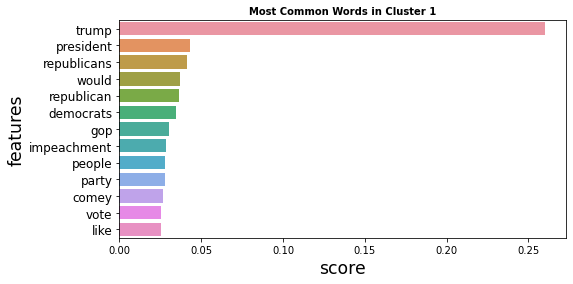

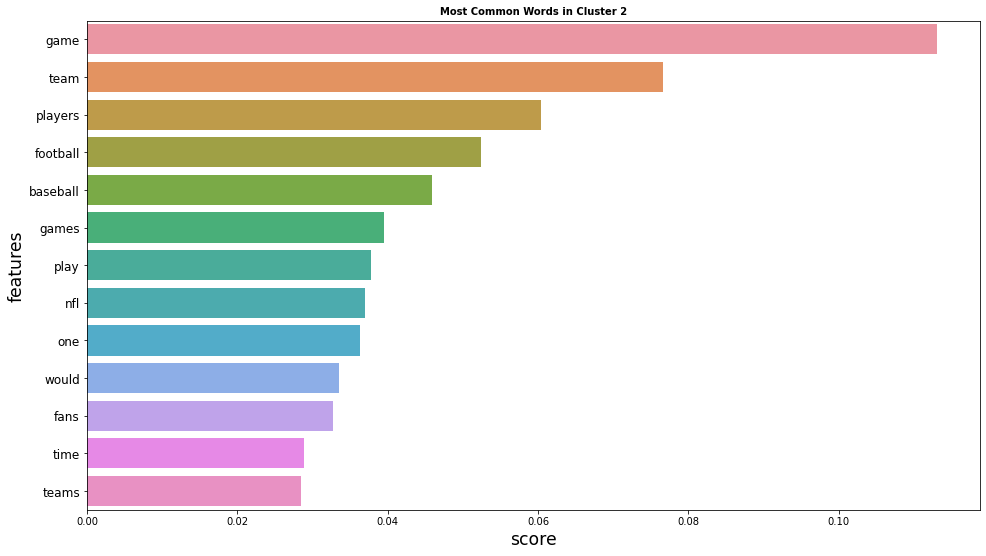

In [ ]:
final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 15
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

Once the K-means algorithm has executed, we plot the graphs to visualize the most common words in the generated clusters.
It is clearly evident that the groupings have been successfully created with one cluster having words like 'trump', 'president', 'republicans', 'democrats', etc to symbolize that this is the Politics category, while the other consisting of words like 'game', 'player', 'football', 'baseball' etc to denote the Sports category.

Additionally, we test this model with a sample comment as shown below. The model is successful in predicting that the comment belongs to the Politics category.

In [ ]:
def sample_clustering(text, df_struct):
  text_words = tokenize_it(text)
  print(text_words)
  for i in text_words:
    df_struct[i] = 1
  return kmeans.predict(df_struct)[0]

copytf = tf_idf.head(1)
sample_text = "Obama is better than Trump"
print("Cluster for sample text:", sample_clustering(sample_text, copytf))

['obama', 'better', 'trump']
Cluster for sample text: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Learning more about Location

Now the next important category to analyze in our dataset is the Location. Seeing user patterns based on location can give us an idea of what are the general likes and dislikes over an area, and in practice can also help publishers figure out how to cater to their target audience and adapt to changes in the trend.

###User Location Cleaning


Taking a look at the location column tells us that while the column seems to be well populated with very little NaNs and Unknows the same location seems to have different versions of the city name. In the most prime example, New York is shown as NY, NYC, new york, and even new york new york. All these variations make it hard for us to get an estimate based on the location , we need to first clean this data to make it more usable. 

First, since a lot of locations have non english characters and numbers in them, they need to be removed before we move on with the sentiment analysis breakup by location

In [ ]:
grouped_locations=sentiment_df[['userLocation', 'commentID','Sentiment_Score']].groupby(by=['userLocation']).agg({'commentID':'count', 'Sentiment_Score':'mean'}).reset_index()
grouped_locations=grouped_locations.sort_values(by='commentID', ascending=False)
grouped_locations=grouped_locations[grouped_locations['userLocation'].map(lambda x: x.isascii())]
grouped_locations['userLocation'] = grouped_locations['userLocation'].str.replace('[^A-Za-z\s]+', '')
grouped_locations=grouped_locations.loc[grouped_locations['userLocation']!='']
grouped_locations=grouped_locations.loc[grouped_locations['userLocation']!=' ']
grouped_locations=grouped_locations.loc[grouped_locations['userLocation']!='  ']
grouped_locations=grouped_locations.loc[grouped_locations['userLocation']!='br']
grouped_locations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,userLocation,commentID,Sentiment_Score
23479,NYC,64668,0.090730
24263,New York,58417,0.087090
6001,California,35634,0.082202
7344,Chicago,27313,0.083688
23413,NY,26043,0.092376
...,...,...,...
22554,Moraga California,1,0.796400
22553,Moraga Ca,1,0.102700
22549,Moraga CA,1,-0.361200
22547,Morada CA,1,0.954500


Next, to takle the primary problem of variation in cities, we need to unify similar ones. This can be done using string similarity. We tried various techniques for string similarity, from SequenceMatcher to Fuzzy String Matching, but the results from these functions gave moderate results as best, and very frequently mis identified states such as New York and New Jersey. 

The most effective and robust method we found to do this task was using a list of states and abbreviations. We used a pre made dictionary we found which just listed each state and its abbreviation (Plus one added for nyc since it is the New York Times dataset and one specifically added to correct Philadelphia since we like our city!).

In [ ]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
    'nyc': 'New York',
    'Philadelphia': "Pennsylvania"
}


 By using string contain and loc we can pretty accurately figure out which states are supposed to be grouped together. This is a very straightforward yet robust method that was able to correct a large portion if of the dataset accurately.

With the following code even a place like 'NYC' will be correctly identified as New York since it contains a capital 'NY' in the name. This is also under the fair assumption that not too many entries will contain a capital NY not to be indended for New York. This is also why we didnt run string contain lowercase abbreviations  such as 'or' would just match with any words such as New York due to the or. 

In [ ]:
for i in states:
  grouped_locations.loc[grouped_locations['userLocation'].str.contains(i), 'userLocation'] = states[i]
  grouped_locations.loc[grouped_locations['userLocation'].str.contains(states[i]), 'userLocation'] = states[i]
  grouped_locations.loc[grouped_locations['userLocation'].str.contains(states[i].lower()), 'userLocation'] = states[i]
  grouped_locations.loc[grouped_locations['userLocation']==i.lower(), 'userLocation'] = states[i]
  grouped_locations.loc[grouped_locations['userLocation']==states[i].lower(), 'userLocation'] = states[i]
grouped_locations=grouped_locations.groupby(by=['userLocation']).agg({'commentID':'sum', 'Sentiment_Score':'mean'}).reset_index()

Which gives us a properly cleaned location dataset. While we do keep the outliers that dont fall in the states catergories the same, these were found to be small and comparatively insignificant, and also impossibly hard to clean with the variance.

Now we can find metrics based on location! 

Now we can re run out previous Location cleaning code in tandem with the one above to give a dataframe with properly cleaned location. And we even add newDesk (Topics column) here so that we can do addtional analysis on topics



In [ ]:
grouped_location_topics=sentiment_df[['userLocation', 'commentID', 'newDesk']].groupby(by=['userLocation', 'newDesk']).agg({'commentID':'count'}).reset_index()
grouped_location_topics=grouped_location_topics.sort_values(by='commentID', ascending=False)
grouped_location_topics=grouped_location_topics[grouped_location_topics['userLocation'].map(lambda x: x.isascii())]
grouped_location_topics['userLocation'] = grouped_location_topics['userLocation'].str.replace('[^A-Za-z\s]+', '')
grouped_location_topics=grouped_location_topics.loc[grouped_location_topics['userLocation']!='']
grouped_location_topics=grouped_location_topics.loc[grouped_location_topics['userLocation']!=' ']
grouped_location_topics=grouped_location_topics.loc[grouped_location_topics['userLocation']!='  ']
grouped_location_topics=grouped_location_topics.loc[grouped_location_topics['userLocation']!='br']

for i in states:
  grouped_location_topics.loc[grouped_location_topics['userLocation'].str.contains(i), 'userLocation'] = states[i]
  grouped_location_topics.loc[grouped_location_topics['userLocation'].str.contains(states[i]), 'userLocation'] = states[i]
  grouped_location_topics.loc[grouped_location_topics['userLocation'].str.contains(states[i].lower()), 'userLocation'] = states[i]
  grouped_location_topics.loc[grouped_location_topics['userLocation']==i.lower(), 'userLocation'] = states[i]
  grouped_location_topics.loc[grouped_location_topics['userLocation']==states[i].lower(), 'userLocation'] = states[i]
grouped_location_topics=grouped_location_topics.groupby(by=['userLocation', 'newDesk']).agg({'commentID':'sum'}).reset_index()

In [ ]:
grouped_location_topics.sort_values(by='commentID', ascending=False).head(10)

,userLocation,newDesk,commentID
37946,New York,OpEd,104436
37943,New York,National,57071
9255,California,OpEd,40350
37964,New York,Washington,27050
37567,New Jersey,OpEd,25739
9252,California,National,24894
37931,New York,Editorial,24889
32157,Massachusetts,OpEd,21419
37933,New York,Foreign,19610
44132,Pennsylvania,OpEd,17936


#### True Result of Location Based User Engagement
Now that we have a cleaned dataset, lets observe which locations have the most comments to see where the interaction is highest!

In [ ]:
grouped_locations_mostcomments=grouped_location_topics[['userLocation', 'commentID']]
grouped_locations_mostcomments=grouped_locations_mostcomments.groupby(by=['userLocation']).agg({'commentID':'sum'}).reset_index()
grouped_locations_mostcomments=grouped_locations_mostcomments.sort_values(by='commentID', ascending=False)
grouped_locations_mostcomments.head(10)

,userLocation,commentID
10575,New York,315708
2393,California,123580
10505,New Jersey,70305
9166,Massachusetts,52782
12024,Pennsylvania,47726
5048,Florida,46013
15654,Texas,43945
10841,North Carolina,38031
3362,Connecticut,35187
11484,Oregon,31510


And thus we can revisit the graph covered earlier to see the true result of the "Location Based User Engagement"

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

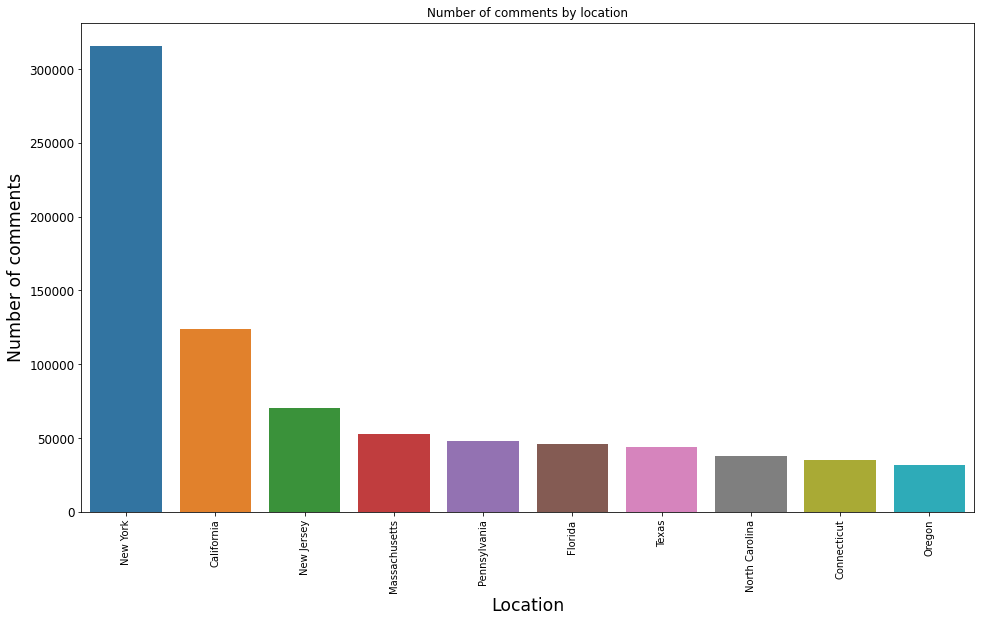

In [ ]:
mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'large'
sns.barplot(x="userLocation", y="commentID", data=grouped_locations_mostcomments.head(10))
plt.ylabel("Number of comments")
plt.xlabel("Location")
plt.title("Number of comments by location")
plt.xticks(rotation=90)

Natrually since the New York Times is aimed and popular most in New York it comes on top of the list by a lot. Even nearby States such as New Jersey, Conneticut, Massachusetts and Pennsylvania have a significant presence in the comments, which could indicate that people tend to be intrested in stuff going on in nearby states, since that could affect them.

#### Most Popular Topics in New York
Now lets see which topics are the most engaging/commented on in New York, since it is the New York Times after all!

Feel free to change the name to any state to see the differences in comment trends. While some topics are very popular in nearly any state, the subtle differences give us a better understanding of where these states differ.


In [ ]:
grouped_locations_nyc=grouped_location_topics
grouped_locations_nyc=grouped_locations_nyc.loc[grouped_locations_nyc['userLocation']=='New York']
grouped_locations_nyc=grouped_locations_nyc.sort_values(by='commentID', ascending=False)
grouped_locations_nyc.head(10)

,userLocation,newDesk,commentID
37946,New York,OpEd,104436
37943,New York,National,57071
37964,New York,Washington,27050
37931,New York,Editorial,24889
37933,New York,Foreign,19610
37926,New York,Business,14446
37940,New York,Metro,10350
37939,New York,Magazine,6324
37928,New York,Culture,6115
37962,New York,Upshot,5329


### Combining Location with Sentiment Analysis

Now that we have analysed the location and topics, lets combine the location with the Sentiment. Here we can find out fun things such as which states are have the most positive and negative comments. To make things fair in terms of mean, we have kept the lower cap to no of comments to 5000.

For this section we will be using the 'grouped_locations' dataset since we had included Sentiment Analysis in there

####Most Positive Locations
To first find out which places have the most poitive sentiments in their comments we 

In [ ]:
grouped_locations_positive=grouped_locations.loc[grouped_locations['commentID']>5000]
grouped_locations_positive=grouped_locations_positive.sort_values(by='Sentiment_Score', ascending=False)
grouped_locations_positive.head(10)

,userLocation,commentID,Sentiment_Score
13715,San Francisco,19227,0.443340
8612,Los Angeles,21541,0.394479
9692,Minneapolis,6398,0.367867
14700,South Carolina,9171,0.224725
9701,Minnesota,15138,0.212703
16810,Vermont,11338,0.211342
16442,USA,22073,0.209282
13026,Rhode Island,6400,0.196514
10518,New Mexico,11944,0.191818
8678,Louisiana,10006,0.189530


Ofcourse since we couldnt really determine the exact location of 'USA' we kept it there as a representative of people who want to not share their location, who turn out to be quite the positive bunch!

#### Most Negative Locations
We do a similar operation to find the most negative locations, by just flipping the order

In [ ]:
grouped_locations_negative=grouped_locations.loc[grouped_locations['commentID']>5000]
grouped_locations_negative=grouped_locations_negative.sort_values(by='Sentiment_Score', ascending=True)
grouped_locations_negative.head(10)

,userLocation,commentID,Sentiment_Score
13695,San Diego,8237,-0.200449
3952,Denver,6098,-0.053949
2479,Canada,10500,-0.004784
16133,Toronto,7627,0.061124
9581,Midwest,8364,0.061947
14145,Seattle,23632,0.077411
1800,Boston,24375,0.079277
6692,Houston,6402,0.086209
10468,New England,7768,0.092690
8965,Manhattan,5491,0.105789


San Diego here wins the most negative state by a really high margin. And it seems only them along with Denver and Canada seem to have an average negative sentiment in the comments. Maybe the possible future steps could include why and what these three places have in common to make such an odd trio.

## Revisiting Author Reputation: A Balance of Different Writing Styles 

Now lets finally combine the sentiment analysis to our previous goals: Author Reputation!

Lets look at which authors excel at uplifting the audiences along with those whose articles seem to get more harsher sentiments and determine what those mean in the context of being an author.

### Authors with More Negative Comments

In the case of authors which tend to get the more negative comments: While it might first seem that those authors who get negative comments, might be a bad reputation for the magazine, but we do take into note that this could be becase these authors tend to push forward with controversial but important topics, or Investigative reports which shed light on some corruption or scandal. These articles might be necessary and imporatnt for the NYT to have which is why we do not classiy this as being a bad thing, but just a deeper insight into authors and their different writing styles

To find this we need to gather what we learned in the previous author reputation analysis and combine that with the data we got from the Sentiment Analysis.
After we merge the best_author dataframe found previously with the sentiment dataframe grouped by articleID we get a final dataframe where each article has the number of comments it recieved along with the sentiment score linked to it.

We then group this by Author and cap the minimum comment number to 5000 for fairness and sort accordingly, to receive the final verdict!

In [ ]:
comments_sentiment_author_neg= sentiment_df[['articleID', 'commentID','Sentiment_Score']].groupby(["articleID"]).agg({'commentID':'count', 'Sentiment_Score':'mean'}).reset_index()
comments_sentiment_author_neg = pd.merge(best_author[['Author','articleID']],comments_sentiment_author_neg,on='articleID')
comments_sentiment_author_neg= comments_sentiment_author_neg.groupby(['Author']).agg({'commentID':'sum', 'Sentiment_Score':'mean'}).reset_index()
comments_sentiment_author_neg=comments_sentiment_author_neg.loc[comments_sentiment_author_neg['commentID']>5000]
comments_sentiment_author_neg=comments_sentiment_author_neg.sort_values(by='Sentiment_Score', ascending=True)
comments_sentiment_author_neg.head(10)

,Author,commentID,Sentiment_Score
627,Eric Schmitt,6606,-0.235123
15,Adam Goldman,7964,-0.093805
1338,Matt Apuzzo,9968,-0.075207
41,Alan Blinder,5952,-0.012211
354,Charles M Blow,57533,0.004744
1318,Mark Landler,28659,0.013263
622,Eric Lichtblau,6643,0.018155
1050,Julie Hirschfeld Davis,17310,0.026469
1623,Peter Baker,31558,0.031459
358,Charlie Savage,5676,0.032408


Eric Schmitt is a NYT Author who writes article on Terrorism and National Security, which are important but understandably topics which would give more negative comments.

Adam Goldman reports on the F.B.I. for NYT and was part of a team that won a Pulitzer Prize in 2018 for national reporting on Russia’s meddling in the presidential election.

So clearly they deserve accolades of their own for tackling topics that are necessary and informative, and is proof that some things, however harsh, deserve to be reported on.

### Positively Valuable Authors

On a lighter note, we similarly find the authors who tend to get positive sentiments on their articles, to finally figure out the authors who focus on increasing enjoyment and postivity.

In [ ]:
comments_sentiment_author_plus= sentiment_df[['articleID', 'commentID','Sentiment_Score']].groupby(["articleID"]).agg({'commentID':'count', 'Sentiment_Score':'mean'}).reset_index()
comments_sentiment_author_plus = pd.merge(best_author[['Author','articleID']],comments_sentiment_author_plus,on='articleID')
comments_sentiment_author_plus= comments_sentiment_author_plus.groupby(['Author']).agg({'commentID':'sum', 'Sentiment_Score':'mean'}).reset_index()
comments_sentiment_author_plus=comments_sentiment_author_plus.loc[comments_sentiment_author_plus['commentID']>5000]
comments_sentiment_author_plus=comments_sentiment_author_plus.sort_values(by='Sentiment_Score', ascending=False)
comments_sentiment_author_plus.head(10)

,Author,commentID,Sentiment_Score
503,Deb Amlen,18864,0.381219
299,Caitlin Lovinger,6199,0.368948
2027,The Learning Network,22411,0.295290
722,Gretchen Reynolds,6685,0.294502
2156,York Times,7477,0.282038
2028,The New,7477,0.282038
1614,Paula Span,5153,0.228308
470,David Brooks,56557,0.202240
1271,M D,5808,0.190185
1302,Margot Sanger Katz,10435,0.187012


So we thank Deb Amlen and Caitlin Lovinger for their amazing efforts to writing and producing amazingly interactive and still positive articles, which no doubt help the reputation that the NYT upholds.

On further digging we found that Deb Amlen is the senior columnist and the public, online voice of The New York Times crossword puzzle 'WordPlay'. She also recieved the Publishers Award by the NYT for her innovation in technology and crossword puzzle publishing. Caitlin Lovinger is also on the NYT crossword publishing team and writes articles on puzzles and quizes.

This does explain a lot of where the positivity comes from in their publishings and shows that crossworld puzzles are still a huge part of the news world today!


## Challenges Faced

- To conduct string similarity, there were lots of issues to correctly identify similar locations. We were  stuck on the fuzzy word similarity function which gave relatively good results for the dataset. However, on analysing it furthur it seemed to mis-identify a lot of states and places, no matter how high the similarity score limit was kept or which scorer we used.


The following was our old code snippet
```
grouped_locations_temp=grouped_locations.loc[grouped_locations['commentID']>1000]

places=grouped_locations_temp['userLocation'].unique()
places=list(places)
change_list=[]
for x in places:
  y = process.extract(x, places)
  temp= pd.DataFrame(y)
  val=list(temp[0])
  change_list.append(val)
  for all in val:
    places.remove(all)
change_list
```
 Which gave relatively good results for the quite a few options such as New York and California, but started to really mess up with some options.
 
 For example, some of the correct and very incorrect result sets were


```
['NYC', 'nyc', 'Nyc', 'NY', 'ny'],  
['California', 'california', 'CA', 'Southern California', 'ca'] 
['Ottawa', 'WA', 'Iowa', 'Tampa', 'Charlotte'],
['US', 'Massachusetts', 'Houston', 'Australia', 'Austin TX'],
['Texas', 'SF', 'TX', 'Montreal', 'United States'],
```

So it was tough for us to figure out a way for it to work more efficiently. We think the given dataset wasn't a good fit for this method and it was challenging for us to figure out something that could do it without such extreme errors.


Finally we noticed a trend in the userLocation column, where even though some user gave their city names, they mentioned the state abbreviation, or had some variation of the exact state name but in all lower case or different cases. Thus the best method turned out to be the logically simplest one, where we just cent state by state found matches in abbreviations and states by playing around with the cases. This turned out to give really good results and didnt have any case where a state was misidentified.


- Since we were working with a really big dataset, the sentiment analysis took up a huge portion of the RAM when running and the Colab session would crash when we tried to run in along with the other cells in our project.

To overcome this, we first ran the Sentiment Analysis Scorer, with the tokenizier, on the entire 2GB dataset and created and stored a dataframe which contained its results. This was uploaded to the Drive.

After this whenever the sentiment analysis module was needed for the project, we loaded the csv file stored on the Drive instead of running the cell all over again. This allowed us to freely work with the sentiment analysis without having to re-run the cell again.





Another huge challenge we faced was the imbalance in data during prediction of whether a comment will be selected by an editor. Since only 2% of the data was predicted as 1s, it was very hard for us to have a good predictive fscore without resampling the data.


Finally, the clustering proved to be hard to run several predictive models on, as even after removing stop words, a large number of the words that were given a high weight by the TF IDF vectorizer were common words that are used in any English statement, and these were getting pooled together, categorzing the cluster by common words, rather than words that categorize an article. 

## Conclusions and Future Work

Our project analyzed the various facets of the New York Times articles and related commenrs, and by analyising its user trends, author types and topics covered we are able to see the impact the newspaper has on its readers, and analyse their behaviour. The Exploratory Data Analysis allowed us to make note of these trends and data, which are essential for any business since the ability to adapt based on changing user trends helps one thrive and grow, which can only be done by breaking down the data and figuring out what it means. 

After analysing this data, we were able to effectively predict factors such as number of upvotes a comment receives, and whether it will be picked by an editor, as well as perform topic detection which can be used to classify future articles and comments based on its collected data. 

We tried various Machine Learning Models, to find that the use of Sentiment Analysis improves the performance of the model trained for Popularity Prediction. The Logistic Regression model worked best for figuring out if a comment will make it to the Editors Pick. 

The Topic Detection model using K-Means Clustering gave us sufficently accurate results when trying to gather which genre of article a particularc comment in referencing.


Through the analysis of trends in sentiments of the public, we were able to determine the importance of a variety of writing styles and authors who strike a delicate balance between positivity and the harsh truth. By observing the sentiment trends followed in the comments, we are able to recognize the impact it has in influencing how crowds react to different topics.


Our future work could include comparing trends in not just the NYT but other publishers as well. The comparision of these publishers could indicate what part of reporting and news do they focus on and the differences in audiences they attract. A furthur analyisis of these topics could also show how much importance a certain publisher gives to discussing important issues and engaging audiences and how they handle information and delivery.

Additionally, the introduction of more complex NLP methods could allow us to make predictions over more complex data that helps make efficient and more insightful deductions that could be used to determine how articles and topics are received by the audience.

Perhaps, if we were to combine more features to the user data, if it were possible to obtain, we could perform an analysis not just defined by user location, but age, gender, occupation. This would no doubt benefit NYT in terms of targeted ads, which writers to keep on, and which types of articles spark the maximum user engagement.


We hope you enjoyed this analysis as much as we did. By the way, do you read the New York Times?



